2.5 
데이터 전처리
- Label encoding: 


In [ ]:
from sklearn.preprocessing import LabelEncoder
items = ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:', labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [ ]:
print('인코딩 클래스: ', encoder.classes_)

인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


In [ ]:
print('디코딩 원본 값:', encoder.inverse_transform([4,5,2,0,1,1,3,3]))
# 원본값이 무엇인지 확인이 가능하다

디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [ ]:
#scikit learn은 먼저 숫자값으로변환을 못해서 LabelEncoder로 변환후,
# 2차원 데이터로 변환하고 원-핫 인코딩을 적용한다
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
labels = labels.reshape(-1,1)
from sklearn.preprocessing import OneHotEncoder
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print(oh_labels.toarray())
print(oh_labels.shape)


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
(8, 6)


In [ ]:
#pandas 에서는 더 쉽게 one-hot encoding 을 할수 있다 먼저 DataFrame을 만든다음에 그 DataFrame을 
# pd.get_dummies(df)를 하면 one-hot encoding이 된다
import pandas as pd
df = pd.DataFrame({'items': ['TV', '냉장고', '전자렌지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})
df = pd.get_dummies(df)
df.head()

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0


**Feature Scaling**
- 표준화: 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것을 의미한다
- 정규화: 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념이다

- StandardScaler: 평균이 0이고 분산이 1인 정규 분포 형태로 변환
- MinMaxScaler: 데이터 값을 0과 1사이의 범위의 값으로 변환한다

**타이타닉 생존자 데이터 분석하기**
1. 먼저 데이터를 불러온다


In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/titanic_train.csv'
titanic_df = pd.read_csv(train)
titanic_df.head()


Mounted at /content/drive


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


titanic_df.

In [ ]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [ ]:
titanic_df['Cabin'].value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
A7             1
D28            1
C62 C64        1
D45            1
C95            1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 null 값 개수 0


sex, cabin, embarked등은 object type으로 되어 있어서 실제로 데이터를 분석하는데 어려움이 있다. 특히 Cabin은 C23, C25 이런씩으로 분석하기 어렵게 알파벳과 숫자가 섞여 있어 앞의 알파벳만 가져와 등급만 판별하는식으로 데이터를 전처리 해준다

In [ ]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [ ]:
titanic_df['Cabin'].value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
              ... 
A7               1
C62 C64          1
D28              1
D45              1
B19              1
Name: Cabin, Length: 148, dtype: int64

In [ ]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [ ]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


In [ ]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

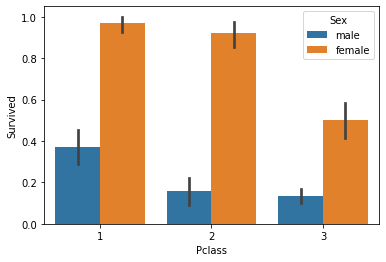

In [ ]:
import seaborn as sns
#hue에 있는 섹션도 같이 비교를 하게 해준다
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

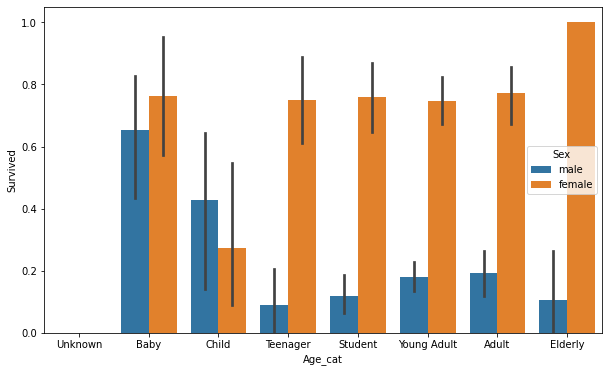

In [ ]:
import matplotlib.pyplot as plt
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [ ]:
#LabelEncoder로 object type으로 설정되어 있던 값들을 int값으로 변환 시켜준다
from sklearn.preprocessing import LabelEncoder

def encode_features(datadf):
  features = ['Cabin', 'Sex', 'Embarked']
  for feature in features:
    le = LabelEncoder()
    le.fit(datadf[feature])
    datadf[feature]= le.transform(datadf[feature])
  
  return datadf

titanic_df = encode_features(titanic_df)
titanic_df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
titanic_df.info()
#보면 전에 object였던 값들이 다들 int나 float으로 바뀌어 있다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/titanic_train.csv'
titanic_df = pd.read_csv(train)
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train, Y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.3, stratify=y_titanic_df)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)

rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)

lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)

print(accuracy_score(dt_pred, Y_test),accuracy_score(rf_pred, Y_test),accuracy_score(lr_pred, Y_test))

0.7761194029850746 0.8022388059701493 0.8059701492537313


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.model_selection import KFold
import numpy as np

def exec_kfold(clf, folds=5):
  kfold = KFold(n_splits=folds)
  scores=[]
  for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
    X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
    Y_train, Y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    scores.append(accuracy)
    print(accuracy)
  mean_score = np.mean(scores)
  print('mean score is : ' ,mean_score)
exec_kfold(dt_clf, folds=5)

0.7597765363128491
0.7696629213483146
0.797752808988764
0.7865168539325843
0.8146067415730337
mean score is :  0.7856631724311092


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)
for iter_count,accuracy in enumerate(scores):
  print('교차 검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.8090
교차 검증 3 정확도: 0.7809
교차 검증 4 정확도: 0.8258
평균 정확도: 0.7879


In [ ]:
from sklearn.model_selection import GridSearchCV

paramss = {'max_depth':[2,3,5,10],
          'min_samples_split':[2,3,5],
          'min_samples_leaf':[1,5,8]}
grid_clf = GridSearchCV(dt_clf, param_grid=paramss, scoring='accuracy',cv=5)
grid_clf.fit(X_train, Y_train)
print(grid_clf.best_params_)
print(grid_clf.best_score_)
#GridSearch에서 제일 좋았던 paramss값의 decisionclassifier이다
best_clf = grid_clf.best_estimator_
print(best_clf)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 3}
0.8170451612903227
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
preds = best_clf.predict(X_test)
accuracy = accuracy_score(preds, Y_test)

In [ ]:
print(accuracy)

0.835820895522388


**분류 성능 평가 지표 정리**

> 사이트 = https://rlagywns0213.github.io/data%20analysis/evaluation/

1. 오차행렬(Confusion Matrix)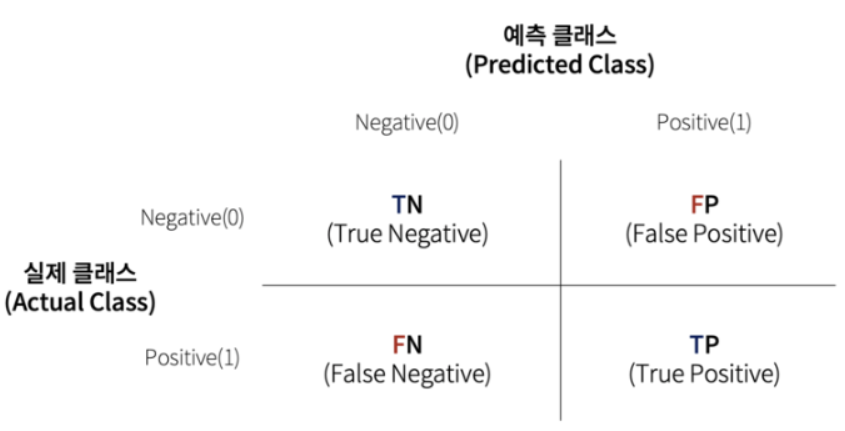

-> 이진 분류의 예측 오류가 얼마인지, 어떤 유형의 예측오류가 발생하는지 파악가능, => 정확도, 정밀도, 재현율 값 확인




In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, fakepred)

정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터수 
= (TN+TP)/(TN+FP+FN+TP)

정밀도 = TP / (FP+TP)
-> 예측을 Positive로 한 대상중에 예측과 실제 값이 Positive로 일치한 데이터의 비율

재현율 = TP / (FN+TP)
실제값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다


In [ ]:
#Precision and Recall
from sklearn.metrics import accuracy_score, precision_score, recall_score
print(precision_score(y_test, preds))
print(recall_score(y_test, preds))


1. 재현율이 상대적으로 더 중요한 지표인 경우, 실제 Positive 양성인 데이터 예측을 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우:    > 암진단, 금융사기
2. 정밀도: 상대적으로 더 중요한 지표인 경우는 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우: >스팸 메일
=> 분류 하려는 업무의 임곗값을 조정해야 한다. (Trade-OFF)


> 임곗값이 - Classifier가 판단할때 기준. 분류 결정 임곗값이 낮아질수록 Positive로 예측할 확률이 높아져 재현율이 증가한다. -> 재현율의 FN이 떨어진다. 정밀도의  FP증가




In [ ]:
#Precision/Recall Trade OFF

pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba() 결과 shape: {0}'.format(pred_proba.shape))
print('pred_proba array 에서 앞 3개만 샘플로 추출 \n: ', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba, pred.reshape(-1,1)], axis=1)
print('두개의 class중에서 더 큰 확률을 클래스 값으로 예측 \n', pred_proba_result[:3])

pred_proba() 결과 shape: (268, 2)
pred_proba array 에서 앞 3개만 샘플로 추출 
:  [[0.71564547 0.28435453]
 [0.87219061 0.12780939]
 [0.69244595 0.30755405]]
두개의 class중에서 더 큰 확률을 클래스 값으로 예측 
 [[0.71564547 0.28435453 0.        ]
 [0.87219061 0.12780939 0.        ]
 [0.69244595 0.30755405 0.        ]]


In [ ]:
from sklearn.preprocessing import Binarizer

X= [[1,-1,2],
    [2,0,0],
    [0,1.1,1.2]]
    #threshold기준값보다 같거나 작으면 0 크면 1을 반환한다
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [ ]:
custom_threshold = 0.5
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

accuracy_score(custom_predict, Y_test)

0.8059701492537313

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)
        print('\n')

get_eval_by_threshold(Y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.4
오차 행렬
[[132  33]
 [ 22  81]]
정확도: 0.7948, 정밀도: 0.7105, 재현율: 0.7864


임곗값: 0.45
오차 행렬
[[134  31]
 [ 23  80]]
정확도: 0.7985, 정밀도: 0.7207, 재현율: 0.7767


임곗값: 0.5
오차 행렬
[[139  26]
 [ 26  77]]
정확도: 0.8060, 정밀도: 0.7476, 재현율: 0.7476


임곗값: 0.55
오차 행렬
[[144  21]
 [ 30  73]]
정확도: 0.8097, 정밀도: 0.7766, 재현율: 0.7087


임곗값: 0.6
오차 행렬
[[149  16]
 [ 34  69]]
정확도: 0.8134, 정밀도: 0.8118, 재현율: 0.6699




F1 Score: 정밀도 와 재현율을 결합한 지표이다. 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타날때 상대적으로 높은 값을 가집니다. 
> F1 스코어의 공식은 2 * precision * recall /  (precision + recall)

ROC곡선은 FPR(False Positive Rate)이 변할떄 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선입니다. FPR을 X축으로 TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다

AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울 수록 좋은 수치이다

- TPR은 TP / (FP + TP) 재현율(민감도), 
- FPR은 Negative를 잘못 예측한 비율 = FP / (FP + TN)


In [ ]:
from sklearn.metrics import f1_score
f1 = f1_score(Y_test, pred)
print('f1score: ', f1)

f1score:  0.7475728155339806


In [ ]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( Y_test, pred)
    accuracy = accuracy_score(Y_test , pred)
    precision = precision_score(Y_test , pred)
    recall = recall_score(Y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(Y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(Y_test, pred_proba[:,1].reshape(-1,1), thresholds)

임곗값: 0.4
오차 행렬
[[132  33]
 [ 22  81]]
정확도: 0.7948, 정밀도: 0.7105, 재현율: 0.7864, F1:0.7465


임곗값: 0.45
오차 행렬
[[134  31]
 [ 23  80]]
정확도: 0.7985, 정밀도: 0.7207, 재현율: 0.7767, F1:0.7477


임곗값: 0.5
오차 행렬
[[139  26]
 [ 26  77]]
정확도: 0.8060, 정밀도: 0.7476, 재현율: 0.7476, F1:0.7476


임곗값: 0.55
오차 행렬
[[144  21]
 [ 30  73]]
정확도: 0.8097, 정밀도: 0.7766, 재현율: 0.7087, F1:0.7411


임곗값: 0.6
오차 행렬
[[149  16]
 [ 34  69]]
정확도: 0.8134, 정밀도: 0.8118, 재현율: 0.6699, F1:0.7340




In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/diabetes.csv'
diabetes_df = pd.read_csv(train)
diabetes_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_df.info()
#null값이 없는것을 확인하였다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
Y_data = diabetes_df['Outcome']
X_data = diabetes_df.drop(['Outcome'], axis=1, inplace=False)

X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.3, stratify = Y_data)
print(X_train.shape, X_test.shape, Y_train.shape)

(537, 8) (231, 8) (537,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()

dt_clf.fit(X_train, Y_train)
dt_pred = dt_clf.predict(X_test)

rf_clf.fit(X_train, Y_train)
rf_pred = rf_clf.predict(X_test)

lr_clf.fit(X_train, Y_train)
lr_pred = lr_clf.predict(X_test)

print(accuracy_score(dt_pred, Y_test),accuracy_score(rf_pred, Y_test),accuracy_score(lr_pred, Y_test))


0.7402597402597403 0.7532467532467533 0.7619047619047619


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lr_clf, X_train, Y_train, scoring='accuracy', cv=5)
print(cv_score)

[0.74074074 0.75       0.77570093 0.78504673 0.81308411]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
from sklearn.model_selection import GridSearchCV
paramss = {'max_depth':[2,3,5,10],
          'min_samples_split':[2,3,5],
          'min_samples_leaf':[1,5,8]}
gs = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5)
gg = gs.fit(X_train, Y_train)
print(gg)
gg.best_estimator_

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [2, 3, 5, 10],
                         

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print(gg.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
print(gg.best_params_)

{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 3}


***분류 알고리즘***
- 베이즈(Bayes) 통계와 생성 모델에 기반한 Naive Bayes
- 독립 변수와 종속변수의 선형 관계성에 기반한 Logistic Regression
- 데이터 균일도에 따른 규칙 기반의 결정 트리 Deicision Tree
- 개별 클래스간의 최대 분류 마진을 효과적으로 찾아주는 Support Vector Machine
- 근접 거리를 기준으로 하는 최소 근접 Nearest Neighbor 
- 심층 연결 기반의 신경망 Neural Network
- 서로 다른 머신러닝 알고리즘을 결합한 Ensemble

정보 균일도 측정방법
 - 정보이득: 엔트로피라는 개념을 기반. 데이터 집합의 혼잡도 의미. 서로 다른 값이 섞여 있으면 엔트로피가 높고 같은 값이 섞여 있으면 엔트로피가 낮다. 정보 이득 지수는 1에서 엔트로피 지수를 뺀 값이다. 
 - 지니 계수ㅣ 원래 경제학에서 불평등 지수를 나타낼 때 사용하는 계수 . 0이 평등, 1로 갈수록 불평등. 지니 계수가 낮을 수록 데이터 균일도 높은것으로 해석되어 낮은 속성 기준으로 분할한다. 

In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/human_activity/features.txt'
feature_name_df = pd.read_csv(train, sep='\s+', header=None, names = ['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print(feature_name[:10])


Mounted at /content/drive
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [ ]:
feature_name_df.head(20)

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


앙상블(Ensemble Learning): 여러개의 분류기를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법.
- Voting
- Bagging : RandomForest
- Boosting : AdaBoosting, GradientBoositng, XGBoost, LightBGM

1. Voting: 서로 다른 알고리즘을 가진 분류기가 결합
2. Bagging: 각각의 분류기가 모두 같은 유형의 알고리즘 기반이지만 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 Voting 수행

Hardvoting vs SoftVoting
Hardvoting:  다수결
SoftVoting: classifier들의 class확률을 평균하여 결정
- predict_proba메소드를 이용하여 class 별 확률 결정




In [ ]:
#VotingClassifier

import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()
data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#Bagging: RandomForestClassifier - Fast and High accuracy
#전체 데이터에서 일부가 중첩되게 샘플링된 데이터 세트. -> Bootstrapping 분할 방식
#n_estimators: 결정 트리의 개수. 
# max_features: 결정 트리에 사용된 max_features와 같다. 
# max_depth, min_samples_leaf-> 똑같이 적용

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_clf = RandomForestClassifier(n_jobs = -1)
params = {'max_depth':[4,6,8,10,12],
          'min_samples_leaf':[4,8,10,16,32],
          'n_estimators':[100, 200]}

gs_clf = GridSearchCV(rf_clf, param_grid=params, cv=2)
gs_clf.fit(X_train, y_train)
preds = gs_clf.predict(X_test)
score = accuracy_score(preds, y_test)
print("score: ", score)

score:  0.9385964912280702


In [ ]:
gs_clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 8, 'n_estimators': 100}

In [ ]:
gs_clf.best_score_

0.9560727258675323

In [ ]:
gs_clf.best_index_

12

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6, min_samples_leaf=8, n_jobs=-1)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.9385964912280702


Boosting: weaker leaner들을 순차적으로 학습예측하면서 잘못 예측한 데이터에 가중치 부여를 통해 오류를 개선해 나가면서 학습하는 방식이다
- GBM 가중치 업데이트를 경사하강법을 이용하는 것이 큰 차이이다. 


*   loss: 비용함수 지정
*   learning_rate = 학습률
*   n_estimators = weak leaner 개수



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time 
from sklearn.model_selection import GridSearchCV

gbm = GradientBoostingClassifier()
params = {'n_estimators':[100, 200, 300],
          'learning_rate': [0.1, 0.001, 0.000001]}

gs_clf = GridSearchCV(gbm, param_grid=params, cv=5)
gs_clf.fit(X_train, y_train)
preds = gs_clf.predict(X_test)
score = accuracy_score(preds, y_test)
print("score: ", score)

score:  0.9736842105263158


In [ ]:
gs_clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [ ]:
from xgboost import XGBClassifier
# scikit-learn wrapper 에서는
# learning_rate, n_estimators, min_child_weight, max_depth, subsample
# reg_lambda: l2규제 적용값, reg_alpha: l1규제 적용값, colsample_bytree: max_features,
# scale_pos_weight: 특정 값으로 치우친 비대창한 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터
# gamma; 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값
# hyperparameter가 있다

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
accuracy_score(preds, y_test)

0.956140350877193

XGBoost 조기중단 기능(EArly Stopping)
- early_stopping_rounds: 더이상 비용 평가 지표가 감소하지 않는 최대 반복횟수
- eval_metric: 반복 수행시 사용하는 비용 평가 지표
- eval_set: 평가를 수행하는 별도의 검증 데이터 세트, 일반적으로 검증 데이터 세트에서 반복적으로 비용 감소 성능 평가



In [ ]:
import xgboost
print(xgboost.__version__)

0.90


In [ ]:
from xgboost import XGBClassifier
evals = [(X_test, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=200, eval_set=evals, eval_metric='logloss', verbose=True)
w_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.547842
[2]	validation_0-logloss:0.494247
[3]	validation_0-logloss:0.447986
[4]	validation_0-logloss:0.409109
[5]	validation_0-logloss:0.374977
[6]	validation_0-logloss:0.345714
[7]	validation_0-logloss:0.320529
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.277991
[10]	validation_0-logloss:0.260302
[11]	validation_0-logloss:0.246037
[12]	validation_0-logloss:0.231556
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.208572
[15]	validation_0-logloss:0.199993
[16]	validation_0-logloss:0.190118
[17]	validation_0-logloss:0.181818
[18]	validation_0-logloss:0.174729
[19]	validation_0-logloss:0.167657
[20]	validation_0-logloss:0.158202
[21]	validation_0-logloss:0.154725
[22]	validation_0-logloss:0.148947
[23]	validation_0-logloss:0.143308
[24]	validation_0-logloss:0.136344
[25]	validation_0-logloss:0.132778
[26]	validation_0-logloss:0.127912

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

evals = [(X_test, y_test)]
params = {'n_estimators':[100,200,300,400],
          'learning_rate':[0.1,0.001,0.0001],
          'max_depth':[4,6,8,10,12],
          'colsample_bytree':[0.5,0.75]
          }
xgb_wrapper = XGBClassifier()
gr_xgb = GridSearchCV(xgb_wrapper, param_grid=params)
gr_xgb.fit(X_train , y_train,  early_stopping_rounds=400,eval_set=evals, eval_metric="logloss",  verbose=True)
w_preds = gr_xgb.predict(X_test)

score = accuracy_score(preds, y_test)
print("score: ", score)

Streaming output truncated to the last 5000 lines.
[19]	validation_0-logloss:0.69153
[20]	validation_0-logloss:0.691447
[21]	validation_0-logloss:0.691369
[22]	validation_0-logloss:0.691289
[23]	validation_0-logloss:0.69121
[24]	validation_0-logloss:0.691126
[25]	validation_0-logloss:0.69105
[26]	validation_0-logloss:0.690964
[27]	validation_0-logloss:0.690887
[28]	validation_0-logloss:0.69081
[29]	validation_0-logloss:0.69073
[30]	validation_0-logloss:0.690646
[31]	validation_0-logloss:0.690568
[32]	validation_0-logloss:0.69049
[33]	validation_0-logloss:0.69041
[34]	validation_0-logloss:0.690335
[35]	validation_0-logloss:0.69025
[36]	validation_0-logloss:0.690165
[37]	validation_0-logloss:0.690086
[38]	validation_0-logloss:0.690008
[39]	validation_0-logloss:0.689928
[40]	validation_0-logloss:0.68985
[41]	validation_0-logloss:0.689771
[42]	validation_0-logloss:0.689685
[43]	validation_0-logloss:0.689607
[44]	validation_0-logloss:0.689528
[45]	validation_0-logloss:0.689449
[46]	validati

LightGBM: 더 빠르고, 더 작은 메모리 사용량, 카테고리형 피처의 자동 변환과 최적 분할.
- 균형 트리 분할 보다는 리프 중심 트리 분할 => 더 빠르게



In [ ]:
import lightgbm
print(lightgbm.__version__)

2.2.3


1. Log변환: 왜곡된 분포도를 가진 데이터 세트를 비교적 정규분포에 가깝게 변환해주는  Feature Engineering
2. IQR(Inter Quantile Range), Outlier Removal
-> 박스 플롯, -> 1/4 분위수 ~ 3/4분위수 IQR
최소값: 1/4분위수에서 1.5*IQR을 뺀 지점
최댓값: 3/4 분위수에서 1.5*IQR값을 더한 지점
이상치는 최댓값, 최소값 /이상, 이하이다
3. UnderSampling, OverSampling;
UnderSampling: 많은 레이블을 가진 데이터 세트를 적은 레이블을 가진 데이터 세트 수준으로 감소 샘플링
OverSampling: 적은 레이블을 가진 데이터 세트를 많은 레이블을 가진 데이터 세트 수준으로 증식
4. SMOTE(Synthetic Minority Over-Sampling Technique): K-최근접 이웃으로 데이터 신규 증식, Over sampling 한다.


In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/creditcard.csv'
card_df = pd.read_csv(train)
card_df.head()



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
card_df.shape

(284807, 31)

In [ ]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
x_data = card_df.iloc[:,:-1]
y_target = card_df.iloc[:,-1]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_target, test_size=0.3, stratify=y_target)
print(y_train.value_counts()/x_train.shape[0]*100)


0    99.827451
1     0.172549
Name: Class, dtype: float64


In [ ]:
from xgboost import XGBClassifier
from lightbgm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

def evaluate_function(model):
  pred = model.predict(x_test)
  ac_score = accuracy_score(pred, y_test)
  pc_score = precision_score(pred, y_test)
  rc_score = recall_score(pred, y_test)
  roc_auc = roc_auc_score(pred, y_test)
  f1 = f1_score(pred, y_test)
  print('Accuracy: {0}, 정밀도: {1}, 재현율: {2},\n roc_auc: {3}, f1_score: {4}'.format(ac_score, pc_score, rc_score, roc_auc, f1))

xg_clf = XGBClassifier()
lgb_clf = LGBMClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[200, 300],
          'learning_rate':[0.01, 0.1],
          'max_depth':[4,8,12],
          'min_child_weight':[3,4,8]}

gs_clf = GridSearchCV(xg_clf, param_grid = params)
gs_clf.fit(x_train, y_train, early_stopping_rounds=30, eval_set=[(x_test, y_test)], eval_metric='logloss')
evaluate_function(gs_clf)

[0]	validation_0-logloss:0.683544
Will train until validation_0-logloss hasn't improved in 30 rounds.
[1]	validation_0-logloss:0.672955
[2]	validation_0-logloss:0.664095
[3]	validation_0-logloss:0.655184
[4]	validation_0-logloss:0.644885
[5]	validation_0-logloss:0.636741
[6]	validation_0-logloss:0.628042
[7]	validation_0-logloss:0.618458
[8]	validation_0-logloss:0.609815
[9]	validation_0-logloss:0.601776
[10]	validation_0-logloss:0.593912
[11]	validation_0-logloss:0.586053
[12]	validation_0-logloss:0.578239
[13]	validation_0-logloss:0.570449
[14]	validation_0-logloss:0.5627
[15]	validation_0-logloss:0.554934
[16]	validation_0-logloss:0.547379
[17]	validation_0-logloss:0.540375
[18]	validation_0-logloss:0.532909
[19]	validation_0-logloss:0.526489
[20]	validation_0-logloss:0.519752
[21]	validation_0-logloss:0.512322
[22]	validation_0-logloss:0.5057
[23]	validation_0-logloss:0.499977
[24]	validation_0-logloss:0.49282
[25]	validation_0-logloss:0.4871
[26]	validation_0-logloss:0.480759
[27]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000, 1000), rotation=60)
sns.displot(card_df['Amount'])

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
amount_n = ss.fit_transform(card_df['Amount'].values.reshape(-1,1))
#card_df.insert(0, 'Amount_Scaled', amount_n)
card_df.drop(['Time', 'Amount'], axis=1, inplace=True)

plt.figure(figsize=(8,4))
plt.xticks(range(0,30000, 1000), rotation=60)
sns.displot(card_df['Amount_Scaled'])

In [ ]:
amount_n = np.log1p(df_copy['Amount_Scaled'])
card_df.insert(0, 'Amount_Scaled', amount_n)


1. log를 적용한 이유는 데이터 분포의 왜도가 너무 커서 적용한 것입니다.
StandardScaler(평균이 0, 표준편차가 1 로 변환)을 적용한 이유는  Recency, Frequency, Monetary 가 서로 다른 단위 값이라 이에 대한 공통 Scale을 적용하기 위한 것입니다. cust_df[['Recency', 'Frequency', 'Monetary']].describe()를 보면 std 값이 각 컬럼별로 큰 차이가 있습니다.

보통 Kmeans는 단위가 다른 여러개의 feature들이 있을 경우 보통은 StandardScaler를 적용하는데, 이는 Kmeans가 일반적으로 거리기반(Euclidean distance) 기반으로 둥글게(등방성, isotropic)하게 데이터를 clustering 하는데 있어서 더 좋은 성능을 나타내기 때문입니다(그렇다고 무조건 좋아지지는 않습니다)

2.np.log1p와 standardscaler 이 두개를 같이 사용할 때 크게 주의해야할 부분은 없습니다.

그리고 원래값을 알기 위해서는 스케일링 했던 반대 순서대로 하면 됩니다.

StandardScaler.fit_transform() 후 log1p하여 변환되었다면, 다시 이 값을 expm1 변환 후 StandardScaler.inverse_transform( ) 하면 됩니다.

감사합니다.

In [ ]:
def get_outlier(df=None, column=None, weight=1.5):
  fraud = df[df['Class']==1][column]
  quantile_25 = np.percentile(fraud.values, 25)
  quantile_75 = np.percentile(fraud.values, 75)
  iqr = quantile_75 - quantile_25
  iqr_weight = iqr*weight
  lowest_val =  quantile_25 - iqr_weight
  highest_val = quantile_75+iqr_weight
  outlier_index = fraud[(fraud<lowest_val) | (fraud>highest_val)].index
  return outlier_index

outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print(outlier_index)

In [ ]:
from imblearn.over_sampling import SMOTE
smote =  SMOTE(random_state=0)
X_train_over, y_train_over =  smote.fit_sample(X_train, y_train)


**Basic** Stacking Model:
기반 모델들이 예측한 값들을 Stacking 형태로 만들어서 메타 모델이 이를 학습후 예측한다





In [ ]:
#STacking Model knn -> kneighbor, rf - randomforest, dt- decisiontree, ada - adaboost
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

**Feature Selection:**
모델을 구성하는 주요 피처들을 선택 
- 불 필요한 다수의 피처들로 인해 모델 성능을 떨어뜨릴 가능성 제거
- 설명 가능한 모델이 될 수 있도록 피처들을 선별
- 피처 값의 분포, Null, 피처간 높은 상관도, 결정값과 의 독립성등을 고려
- Feature importance 기반

1. RFE(Recursive Feature Elimination): 모델 최초 학습후 Feature 중요도 선정, feature 중요도가 낮은 속성들을 차례대로 제거해가며 반복적으로 학습 수행, 최적 Feature 추출
-> 데이터가 작을때만 사용, 너무 오래걸림
2. SelectFromModel: 모델 최초 학습 후 선정된 Feature 중요도에 따라 평균/중앙값의 특정 비율이상인 Feature 들을 선택



In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=25, n_informative=3, n_redundant=2, n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0)
svc=SVC(kernel='linear')
rfecv=RFECV(estimator=svc, step=1, cv=StratifiedKFold(2), scoring='accuracy', verbose=2)
rfecv.fit(X, y)
print(rfecv.n_features_)

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.


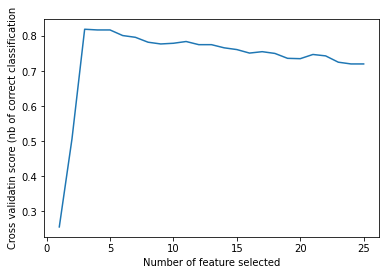

In [ ]:
plt.figure()
plt.xlabel('Number of feature selected')
plt.ylabel('Cross validatin score (nb of correct classification')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)

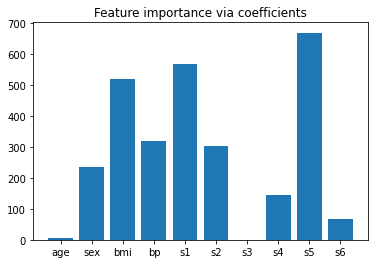

In [ ]:
#SelectFromModel
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LassoCV
lasso = LassoCV().fit(X,y)
importance = np.abs(lasso.coef_)
feature_names = np.array(diabetes.feature_names)
plt.bar(height = importance, x=feature_names)
plt.title('Feature importance via coefficients')
plt.show()



In [ ]:
print(lasso.coef_)
print(diabetes.feature_names)

[  -6.49684455 -235.99640534  521.73854261  321.06689245 -569.4426838
  302.45627915   -0.          143.6995665   669.92633112   66.83430445]
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
from sklearn.feature_selection import SelectFromModel
from time import time

threshold = np.sort(importance)[-3] + 0.01
print('threshold: ', threshold)

sfm =  SelectFromModel(lasso, threshold =threshold).fit(X, y)
print('feature selected by selectfromModel: ',  f"{feature_names[sfm.get_support()]}")

threshold:  521.748542606749
feature selected by selectfromModel:  ['s1' 's5']


Permutation importance 개요
- 특정 피처들의 값을 완전히 변조했을 때 모델 성능이 얼마나 저하되는지를 기준으로 해당 피처의 중요도를 산정. 
- 반복적으로 변조한뒤 피처의 중요도를 평균적으로 산정


In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(diabetes.data, diabetes.target, random_state=0)
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

0.35666062386954556

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,n_repeats=30,random_state=0)

for i in r.importances_mean.argsort()[::-1]:
  if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{diabetes.feature_names[i]:<8}"f"{r.importances_mean[i]:.3f}"f" +/- {r.importances_std[i]:.3f}")

s5      0.204 +/- 0.050
bmi     0.176 +/- 0.048
bp      0.088 +/- 0.033
sex     0.056 +/- 0.023


In [ ]:
r.importances_mean

array([-0.00199267,  0.05587407,  0.17579   ,  0.08836513,  0.04221134,
        0.00203626,  0.00203754,  0.00318695,  0.20423412,  0.00278683])

Feature importance는 
- 최적 tree 구조를 만들기 위한 피처들의 impurity가 중요 기준. 결정값과 관련이 없어도 높아질수 있다. 
-  학습 데이터를 기반으로 생성되기 때문에 테스트 데이터에서는 다를수가 있다. 
- number형의 높은 cardinality feature에 biased 되어있다. 



회귀: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법
- 여러개의 독립변수와 한 개의 종속 변수간의 상관관계를 모델링하는 기법을 통칭한다. 

> 머신러닝 회귀 예측의 핵심은 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀계수를 찾아내는 것이다.

- 독립변수 개수 1개 : 선형  회귀
- 독립변수 개수 여러개: 다중 회귀, 비선형 회귀

선형 회귀 종류: 
- 일반 선형 회귀: 규제를 적용하지 않은 모델
- Ridge: L2규제
- Lasso: L1규제 
- ElasticNet: L2, L1 규제 함꼐 결합
- LogisticRegression: 사실은 분류에 속함

RSS: 오류 값의 제곱을 구해서 더하는 방식. 미분등의 계산을 편리하게 하기 위해서  RSS 방식으로 오류합을 구합니다. 
=> 비용함수 -> 미분값이 계속 감소하는 방향으로 순차적으로 w를 업데이트 한다. 더이상 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 w를 반환한다

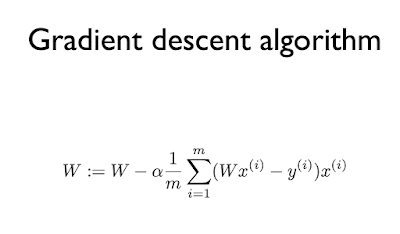



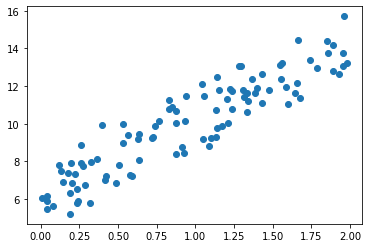

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6 식을 근사(w1=4, w0=6). random 값은 Noise를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 +4 * X+np.random.randn(100,1)

# X, y 데이터 셋 scatter plot으로 시각화
plt.scatter(X, y)

In [ ]:
#Gradient descent
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(y)
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  w0_factors = np.ones((N,1))
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
  return w1_update, w0_update

In [ ]:
def gradient_descent_steps(X, y, iters=10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update
  
  return w1, w0


In [ ]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
y_pred = w1[0,0]*X + w0
print(get_cost(y, y_pred))

0.9934784315632568


In [ ]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index = 0
  for ind in range(iters):
    np.random.seed(ind)
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0 - w0_update
  return w1, w0

**회귀 평가 지표**
- MAE(Mean Absolute Error(MAE)): 실제값과 예측값의 차이를 절대값으로 변환해 평균한거
- MSE(Mean Squared Error(MSE)): 실제값과 예측값의 차이를 제곱해 평균한 것
- MSLE: MSE에 로그 적용, 결정값이 클수록 오류값도 커지기 때문에 일부 큰 오류값들로 인해 전체 오류 값이 커지는 것을 막아줌
- RMSE: MSE에 루트를 씌운것
- RMSLE: RMSE에 로그 적용
- R^2 = 분산 기반으로 예측 성능 평가, 1에 가까울수록 정확도가 높다

평가 API
- MAE: metrics_mean_absolute_error
- scoring 파라미터 값: neg_mean_absolute_error: 음수값을 반환하는 이유는 scoring함수가 score가 클수록 좋은 평가 결과로 자동 평가한다. 고로 음수를 만들어 작은 오류값이 더 큰 숫자로 인식하게 만든다

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()


Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


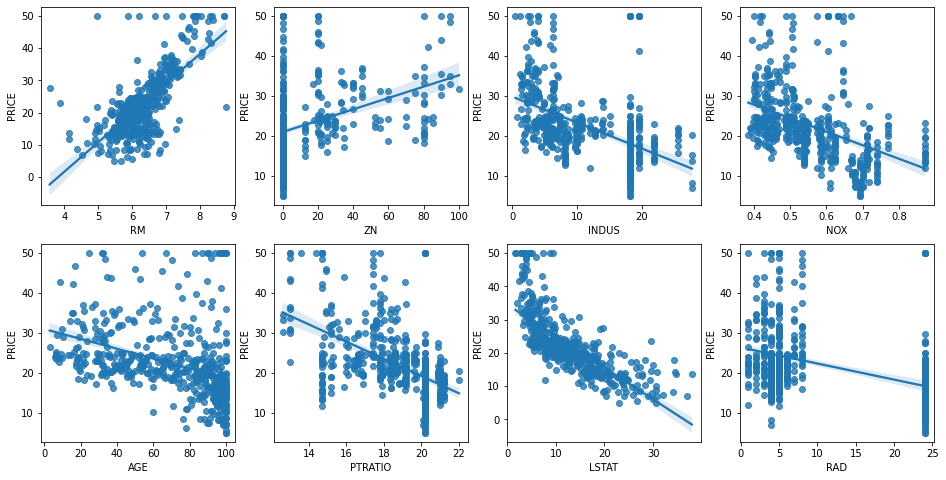

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757


In [ ]:

print('절편 값:',lr.intercept_)
print('회귀 계수값:', np.round(lr.coef_, 1))

절편 값: 40.995595172164755
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [ ]:
coeff = pd.Series(data =np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [ ]:

from sklearn.model_selection import cross_val_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
lr = LinearRegression()

# cross_val_score( )로 5 Fold 셋으로 MSE 를 구한 뒤 이를 기반으로 다시  RMSE 구함. 
neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# cross_val_score(scoring="neg_mean_squared_error")로 반환된 값은 모두 음수 
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 2))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
 5 folds 의 개별 RMSE scores :  [3.53 5.1  5.75 8.99 5.77]
 5 folds 의 평균 RMSE : 5.829 


다항 회귀는 선형회귀, 회귀를 나누는 기준은 회귀 계수가 선형인지 비선형인지에 따라 나누어진다.

다항회귀: PolynomialFeatures로 원본 단항피처들을 다항 피처들로 변환한 데이터 세트에 LinearRegression객체를 적용하여 다항회귀 기능을 제공
=> 이를 편하게 만들어주는 클래스는 Pipeline

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print(X)
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]]
[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
  y = 1 + 2*X[:,0]+3*X[:,0]**2 + 4*X[:,1]**3
  return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)
model = model.fit(X, y)
print(np.round(model.named_steps['linear'].coef_, 2))
#편향이 높으면 분산은 낮아지고, 분산이 높으면 편향이 낮아진다

[0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


규제 선형 회귀: 
최적 모델을 위한 Cost 함수 구성요소 = 학습 데이터 잔차 오류 최소화 + 회귀계수 크기 제어
alpha값을 조절한다 
1. alpha=0, 비용함수는 Min(RSS(W))
2. alpha=무한대, alpha*회귀계수가 무한대 -> 비용함수는 W를 0에 가깝게 최소화

규제: alpha값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합 개선
1. L2규제(Ridge):alpha*W^2와 같이 W의 제곱에 대해 페널티를 부여
2. L1규제(Lasso): alpha*W, W의 절댓값에 대해 페널티 부여 (영향력이 크지 않은 회귀 계수는 0)
3. ElasticNet: L2 + L1규제를 함께 결합한 모델


선형 회귀 모델을 위한 데이터 변환: 정규분포 형태를 매우 선호한다. 
- 타깃값 변환: 반드시 정규분포, 로그 변환!
- 피처값 변환: 
1. StandardScaler, MinMaxScaler(예측 성능 향상 어려움)
2. 다항 특성을 적용하여 변환(과적합이슈)
3. log변환
- 데이터 인코딩은 원-핫 인코딩 적용
 

로지스틱 회귀: 선형 회귀 방식을 분류에 적용한 알고리즘이다. 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환값을 확률로 간주해 확률에 따라 분류를 결정한다. (0과 1)



회귀트리: 분류뿐만 아니라 회귀도 가능하다
- Cart 회귀 트리는 분류와 유사하게 분할을 하며, 분할 기준은 RSS가 최소가 될 수 있는 기준을 학습, 예측한다
1. RSS를 최소화 하는 규칙 기준에 따라 분할
2. 최종 분할된 영역에 있는 데이터들의 평균값들로 학습/예측

DecisionTreeRegressor/GradientboostingRegressor 등

In [ ]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
rf = RandomForestRegressor(n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target, scoring='neg_mean_squared_error', cv=5)
avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
print(avg_rmse)

4.417708698386852


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
  neg_mse_scores = cross_val_score(model, X_data, y_target, cv=5, scoring='neg_mean_squared_error')
  rmse_score = np.sqrt(-1*neg_mse_scores)
  avg_rmse = np.mean(rmse_score)
  print(avg_rmse)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

# 트리 기반의 회귀 모델을 반복하면서 평가 수행 
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:  
    get_model_cv_prediction(model, X_data, y_target)

5.977957424580515
4.420358097543781
4.269199457750235
[13:37:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:37:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
4.088922560380566
4.646441191925675


In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/bike-sharing-demand/train.csv'
bike_df = pd.read_csv(train)
bike_df.head()



Mounted at /content/drive


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
from datetime import date, datetime, time
#datetime object로 바꾸고 쉽게 year, month, day, hour등을 뽑아낸다
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)
bike_df['year'] = bike_df.datetime.apply(lambda x:x.year)
bike_df['month'] = bike_df.datetime.apply(lambda x:x.month)
bike_df['day']  = bike_df.datetime.apply(lambda x:x.day)
bike_df['hour']  = bike_df.datetime.apply(lambda x:x.hour)

In [ ]:
bike = bike_df.copy()
bike.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2011,1,1,2
3,1,0,0,1,9.84,14.395,75,0.0,13,2011,1,1,3
4,1,0,0,1,9.84,14.395,75,0.0,1,2011,1,1,4


In [ ]:
from sklearn.model_selection import train_test_split

y_target = bike['count']
X_data = bike.drop(['count'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3)
print(x_train.shape, x_test.shape)

(7620, 12) (3266, 12)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rfe = RandomForestRegressor()
lr = LinearRegression()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
lgbm = LGBMRegressor()

models = [rfe, lr, dtr, gbr, xgb, lgbm]

def rmsle(y, pred):
  log_y = np.log1p(y)
  log_pred = np.log1p(pred)
  squared_error = (log_y - log_pred)**2
  rmsle = np.sqrt(np.mean(squared_error))
  return rmsle

def rmse(y,pred):
  return np.sqrt(mean_squared_error(y,pred))

def evaluate_regr(y,pred):
  rmsle_val = rmsle(y,pred)
  rmse_val = rmse(y,pred)
  mae_val = mean_absolute_error(y,pred)
  print('RMSLE: {0:.3f}, RMSE: {1:.3F}, MAE: {2:.3F}'.format(rmsle_val, rmse_val, mae_val))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lr.fit(x_train, y_train)
pred =lr.predict(x_test)
evaluate_regr(y_test, pred)

RMSLE: 1.174, RMSE: 143.537, MAE: 107.709


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in log1p


In [ ]:
def get_top_error_data(y_test, pred, n_tops = 5):
    # DataFrame에 컬럼들로 실제 대여횟수(count)와 예측 값을 서로 비교 할 수 있도록 생성. 
    result_df = pd.DataFrame(y_test.values, columns=['real_count'])
    result_df['predicted_count']= np.round(pred)
    result_df['diff'] = np.abs(result_df['real_count'] - result_df['predicted_count'])
    # 예측값과 실제값이 가장 큰 데이터 순으로 출력. 
    print(result_df.sort_values('diff', ascending=False)[:n_tops])
    
get_top_error_data(y_test,pred,n_tops=5)

      real_count  predicted_count   diff
1738         834            186.0  648.0
3059         809            196.0  613.0
578          731            140.0  591.0
3196         890            325.0  565.0
884          968            408.0  560.0


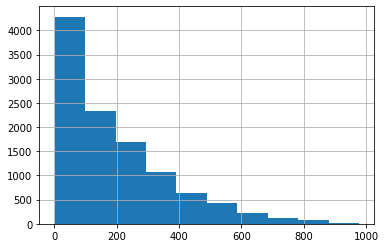

In [ ]:
#1 회귀에서 제일 중요한것은 target값이 정규분포인가를 확인해야한다
y_target.hist()

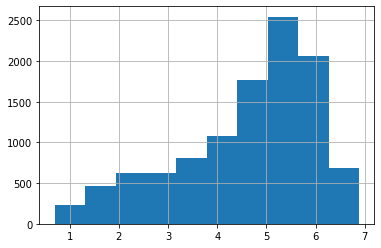

In [ ]:
y_log_transform = np.log1p(y_target)
y_log_transform.hist()

In [ ]:
y_target_log = np.log1p(y_target)
x_train, x_test, y_train, y_test = train_test_split(X_data, y_target_log, test_size=0.3)
lr=LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(x_test)
y_test_exp = np.expm1(y_test)
pred_exp = np.expm1(pred)
evaluate_regr(y_test_exp, pred_exp)

RMSLE: 1.023, RMSE: 162.142, MAE: 107.382


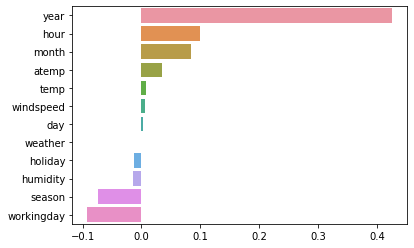

In [ ]:
coef = pd.Series(lr.coef_, index=x_train.columns)
coef_sort = coef.sort_values(ascending=False)
sns.barplot(x=coef_sort.values, y=coef_sort.index)

year가 제일 높은 값인것은 가장 이해가 되지 않는다. season, workingday, holiday가 음수로 가있다

In [ ]:
#one hot encoding 을 해준다
#X_features_ohe = pd.get_dummies(~~)


In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/house-prices-advanced-regression-techniques/train.csv'
house_df = pd.read_csv(train)
house_df.head()

Mounted at /content/drive


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
isnull = house_df.isnull().sum()
isnull[isnull>0].sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


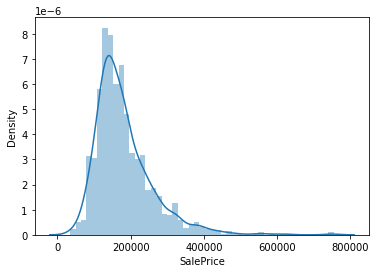

In [ ]:
import seaborn as sns
sns.distplot(house_df['SalePrice'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


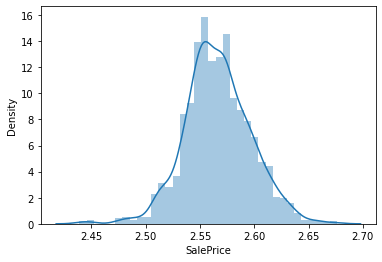

In [ ]:
import numpy as np

sns.distplot(np.log1p(house_df['SalePrice']))

In [ ]:
# SalePrice 로그 변환
import numpy as np
import pandas as pd
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

# Null 이 너무 많은 컬럼들과 불필요한 컬럼 삭제
#house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체
house_df.fillna(house_df.mean(),inplace=True)

# Null 값이 있는 피처명과 타입을 추출
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [ ]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1460, 75)
get_dummies() 수행 후 데이터 Shape: (1460, 271)
## Null 피처의 Type :
 Series([], dtype: object)


In [ ]:
def get_rmse(model):
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  rmse = np.sqrt(mse)
  print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
  return rmse

def get_rmses(models):
  rmses = []
  for model in models:
    rmse = get_rmse(model)
    rmses.append(rmse)
  return rmses

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# LinearRegression, Ridge, Lasso 학습, 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.003
Ridge 로그 변환된 RMSE: 0.003
Lasso 로그 변환된 RMSE: 0.006


[0.0029719446838148956, 0.002817799913420215, 0.0062400136337322915]

In [ ]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명. 
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low

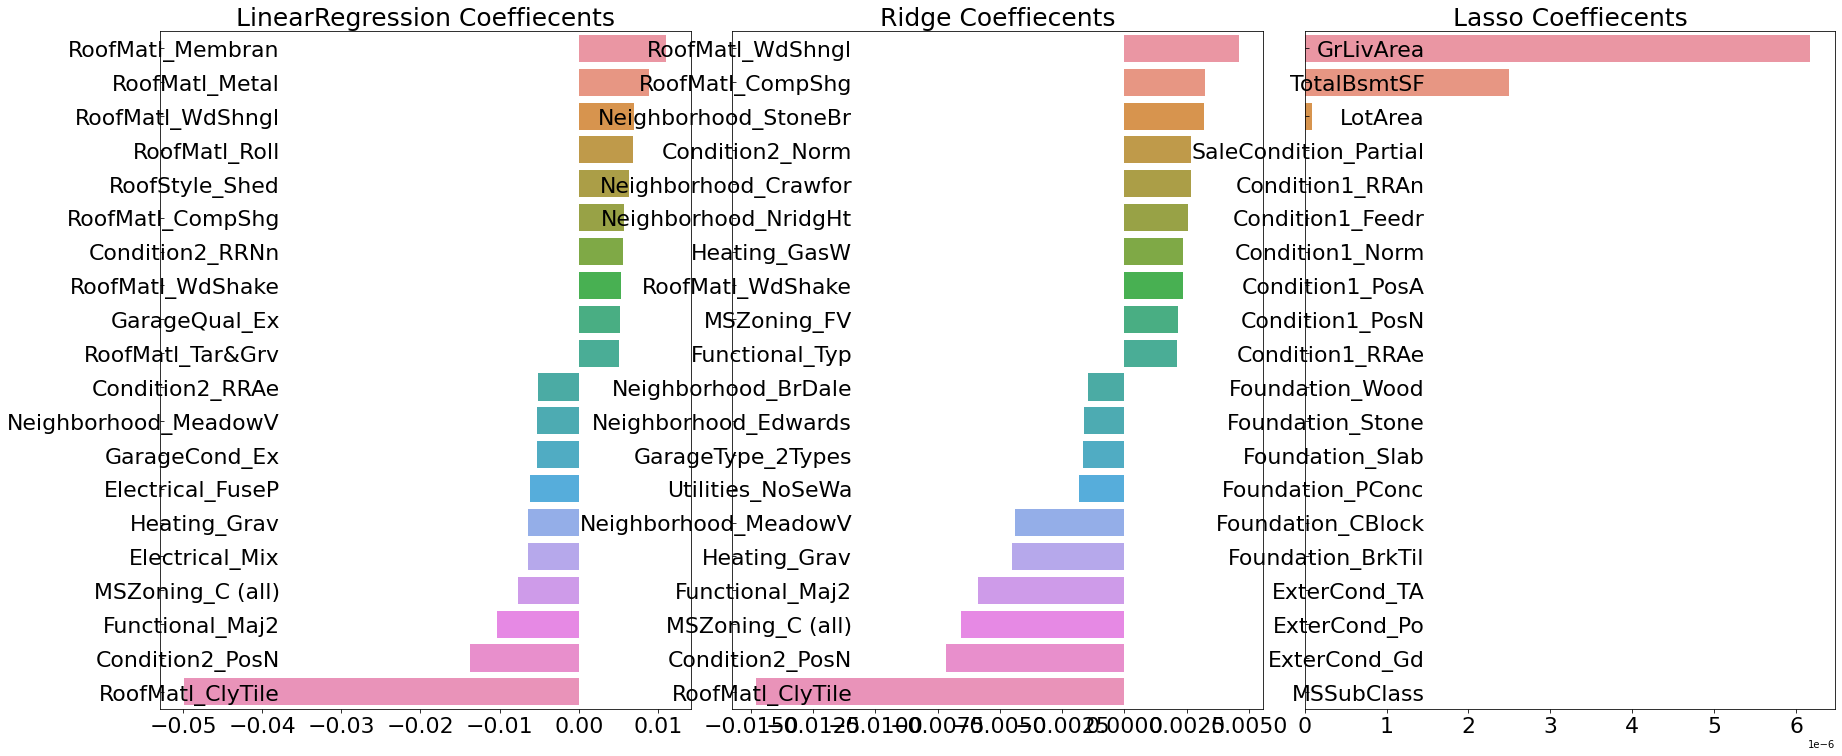

In [ ]:
import matplotlib.pyplot as plt
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화. 
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합. 
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정. 
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.    
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
  for model in models:
    rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring = 'neg_mean_squared_error', cv=5))
    rmse_avg = np.mean(rmse_list)
    print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
    print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 CV RMSE값 출력           
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.003 0.004 0.004 0.002 0.004]
LinearRegression CV 평균 RMSE 값: 0.003

Ridge CV RMSE 값 리스트: [0.003 0.003 0.003 0.003 0.004]
Ridge CV 평균 RMSE 값: 0.003

Lasso CV RMSE 값 리스트: [0.006 0.007 0.006 0.006 0.006]
Lasso CV 평균 RMSE 값: 0.006


In [ ]:
from sklearn.model_selection import GridSearchCV
def get_best_params(model, params):
  grid_model = GridSearchCV(model, param_grid=params, cv=5, scoring='neg_mean_squared_error')
  grid_model.fit(X_features, y_target)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
  return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0031, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.0039, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.003
Ridge 로그 변환된 RMSE: 0.003
Lasso 로그 변환된 RMSE: 0.004


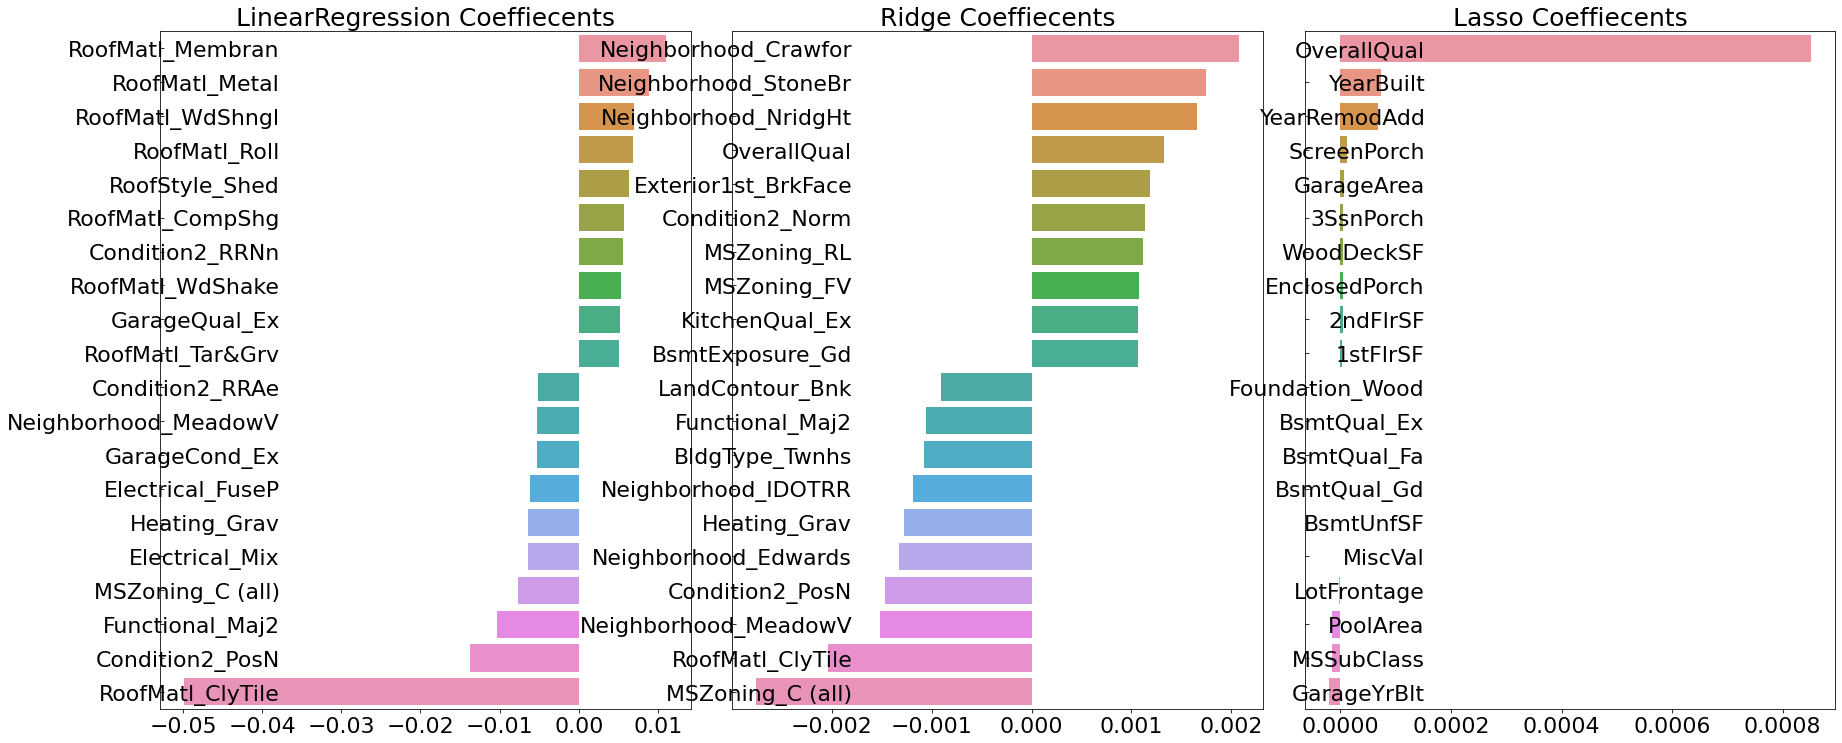

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [ ]:
from scipy.stats import skew
#왜곡도
features_index = house_df.dtypes[house_df.dtypes != 'object'].index

skew_features = house_df[features_index].apply(lambda x:skew(x))
skew_features_top = skew_features[skew_features >1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [ ]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

In [ ]:
# Skew가 높은 피처들을 로그 변환 했으므로 다시 원-핫 인코딩 적용 및 피처/타겟 데이터 셋 생성,
house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 피처들을 로그 변환 후 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = get_best_params(ridge_reg, ridge_params)
best_lasso = get_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.0028, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.004, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.003
Ridge 로그 변환된 RMSE: 0.003
Lasso 로그 변환된 RMSE: 0.004


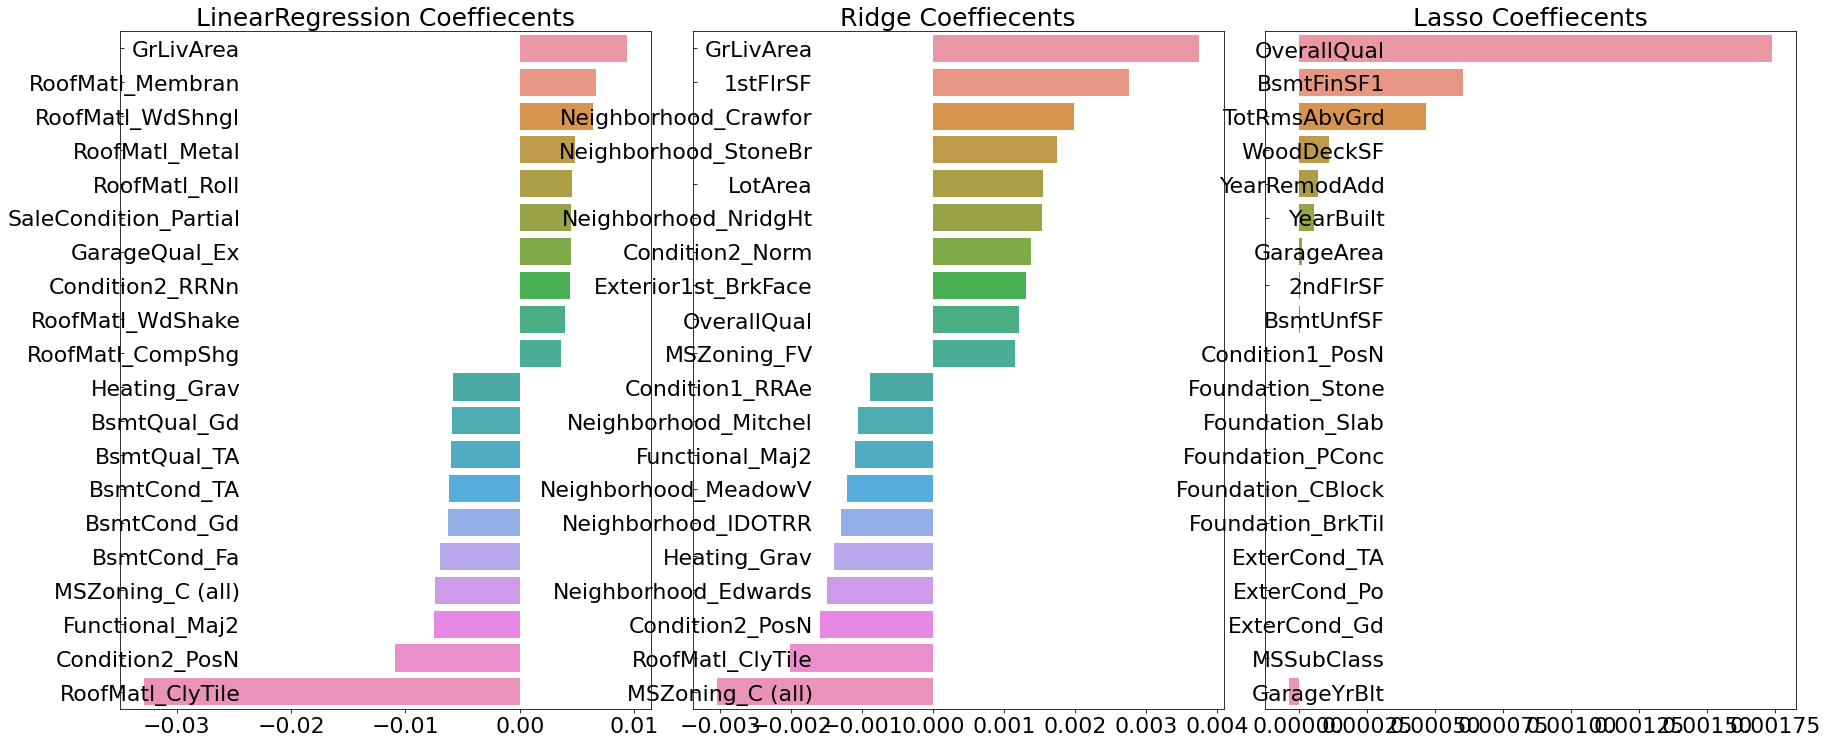

In [ ]:
# 앞의 최적화 alpha값으로 학습데이터로 학습, 테스트 데이터로 예측 및 평가 수행. 
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

# 모든 모델의 RMSE 출력
models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

# 모든 모델의 회귀 계수 시각화 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

#차원축소 PCA
차원이 커질수록 데이터 포인트들간 거리가 크게 늘어나고 데이터가 희소화된다
- 상관관계가 높아 다중 공선성 문제로 예측 성능 저하 가능성
######차원축소의 장점 - 학슴 시간 절약, 성능 향상, 시각적으로 쉽게 데이터 패턴 인지

1. 피처 선택: 불필요한 피처는 아예 제거, 데이터의 특징이 잘 나타내는 주요 피처만 선택
2. 피처 추출: 기존 피처를 저차원의 중요피처로 압축해서 추출. 새로운 피처로 추출

잠재적인 Latent요소 추출
- 추천엔진, 이미지 분류 및 변환, 문서 토픽 모델링

PCA: 고차원의 원본 데이터를 저차원의 부분 공간으로 투영하여 데이터를 축소(10 차원-> 2차원)
- 원본 데이터 변동성이 가장 큰 방향으로 순차적으로 축들을 생성하고 이렇게 생성된 축으로 데이터를 투영하는 방식
- 가장 큰 데이터 변동성을 기반으로 첫 번째 벡터 축을 생성하고 두번째 축은 첫번째 축을 제외하고 그다음으로 큰 축을 설정하는데 이는 첫번째 축에 직각이 되는 벡터축. 또 세번재는 두번째의 직각.

PCA변환
1. 원본 데이터의 공분산 행렬 추출 
2. 공분산 행렬을 고유벡터와 고유값 분해
3. 원본 데이터를 고유 벡터로 선형 변환
4. PCA 변환 값 도출

공분산 행렬: 여러변수와 관련된 공분산을 포함하는 정방형 행렬이며 대칭행렬이다.



In [ ]:
#PCA 클래스
#sklearn.decomposition.PCA(n_components=None(변환차원), copy, whiten..)
#전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 explained_variance_ratio속성으로 제공
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


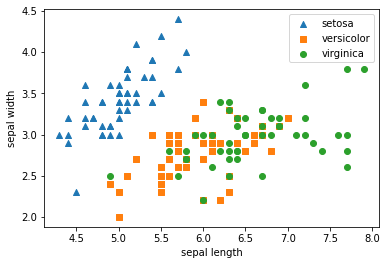

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

In [ ]:
iris_scaled.shape

(150, 4)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [ ]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


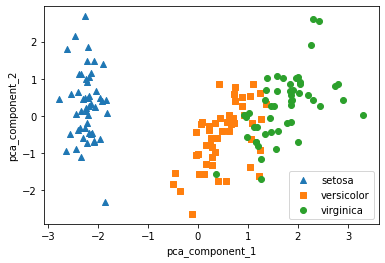

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()


In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/pc_credit_card.xls'
df = pd.read_excel(train, sheet_name='Data', header=1)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


LDA: 선형 판별 분석법
- 지도학습의 분류에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하며서 차원을 축소. 입력 데이터의 결정값 클래스를 최대한으로 분리할수 있는 축을 찾는다


특이값 분해 - SVD(Singular Value Decomposition)
- 정방행렬 뿐만아니라 행과 열의 크기가 다른 m*n행렬도 분해 가능
- 모든 특이 벡터는 서로 직교하는 성질을 가진다.
- 시그마는 대각행렬이며, 행렬의 대각에 위치한 값만 0이 아니고 나머지 위치의 값은 모두 0이다. 

A
=
U
Σ
V
T
  
(1)
 
여기서 네 행렬(
A
,
U
,
Σ
,
V
)의 크기(혹은 차원)와 성질은 다음과 같다.

A
: 
m
×
n
 rectangular matrix
U
: 
m
×
m
 orthogonal matrix
Σ
: 
m
×
n
 diagonal matrix
V
: 
n
×
n
 orthogonal matrix

orthogonal matrix는 다음의 성질을 만족하는 행렬이다.

U
가 orthogonal matrix라고 한다면,

U
U
T
=
U
T
U
=
I
  
(2)
 
이에 따라, 
U
−
1
=
U
T
라는 사실도 부가적으로 확인된다.

또, diagonal matrix는 다음과 같은 성질을 만족하는 행렬이다.

Σ
가 diagonal matrix라고 한다면 
Σ
의 대각성분을 제외한 나머지 원소의 값은

모두 0이다.


SVD는 차원 축소를 위한 행렬분해를 통해 Latent Factor를 찾을수 있는데 이렇게 찾아진 Latent Factor는 많은 분야에 활용. 행렬 분해된뒤 다시 분해된 행렬을 이용하여 원복된 데이터 셋은 잡음이 제거된 형태로 재구성될 수 있다.

In [ ]:
import numpy as np
from numpy.linalg import svd
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [ ]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)

(4, 4) (4,) (4, 4)


In [ ]:
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


Text(0, 0.5, 'TruncatedSVD Component 2')

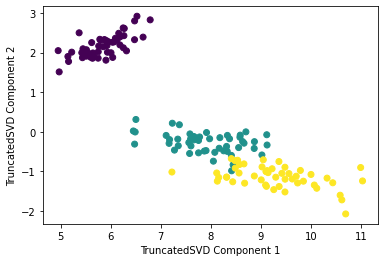

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

Text(0.5, 1.0, 'PCA Transformed')

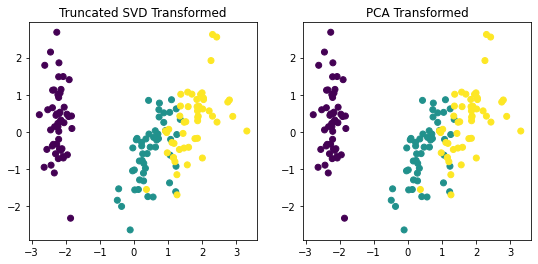

In [ ]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

NMF(NonNegative Matrix Factorization): 모두 양수라는 게 보장이 되면 좀 더 간단하게 두개의 기반 양수 행렬로 분해될 수 있는 기법


Text(0, 0.5, 'NMF Component 2')

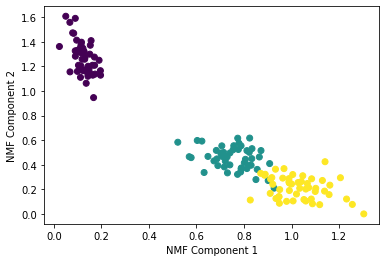

In [ ]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

군집화: 데이터 포인트들을 별개의 군집으로 그룹화 하는것. 서로 다른 군집들이 상이성을 가지도록 분류한다
- 고객 맞춤 세분화, Image검출, 이상 검출등에 활용된다

알고리즘
- K-Means
- Mean Shift
- Gaussian Mixture Model: 어떤 정규분포
- DBSCAN: 데이터의 밀도에 따라 군집화

1. K-Means Clustering: 군집 중심점 기반 클러스터링
- 속성의 개수가 매우 많을 경우 군집화 정확도가 떨어져 PCA로 차원 축소를 적용해야할수도 있다 + 이상치 데이터에 취약
-n_clusters: 군집화 개수
- init: 군집 중심점의 좌표를 설정할 방식, 보통은 임의로 중심을 설정하지 않고 일반적으로 k-means++ 방식으로 최초 설정
- max_iter: 최대 반복 횟수. 




In [ ]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0).fit(irisDF)

In [ ]:
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


In [ ]:
irisDF['cluster'] = kmeans.labels_

In [ ]:
irisDF['target']=iris.target
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64


실루엣 분석: 각 군집간의 거리가 얼마나 효율적으로 분리돼 있는지를 나타낸다. 
- 실루엣 계수를 기반으로 한다: 해당 데이터가 같은 군집 내의 데이터와 얼마나 가깝게 군집화돼있고 다른 군집 데이터와 얼마나 멀리 분리되어 있는지

sklearn.metrics.silhouette_samples(X, labels, metric='euclidean', **kwds)
- 0~1사이의 값을 가지며, 1에 가까울수록 좋다
- 하지만 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야 한다


Mean Shift: KDE(Kernel Density Estimation)를 이요하여 데이터 포인트들이 데이터 분포가 높은곳으로 이동하면서 군집화를 수행
- Mean shift 클러스터링은 데이터 포인트의 밀집된 영역을 찾기 위해 시도하는 슬라이딩 윈도우 기반 알고리즘입니다. 이는 중심점에 대한 후보를 슬라이딩 윈도우 내의 포인트의 평균으로 업데이트하여 작동하는 각 그룹 / 클래스의 중심점을 찾는 것이 목표라는 것을 의미하는 centroid 기반 알고리즘입니다. 이러한 후보 윈도우는 후 처리 단계에서 필터링되어 거의 중복을 제거하여 최종 세트의 중심점과 해당 그룹을 형성합니다.

KDE: 커널함수를 통해 어떤 변수의 확률밀도 함수를 추정하는 방식. 관측된 데이터 각각에 커널함수를 적용한 값을 모두 더한뒤 데이터 건수로 나누어서 확률 밀도 함수를 추정

**확률 밀도 추정 방법**
- 모수적 (PArametric) 추정: 데이터가 특정 데이터 분포를 따른다는 가정하에 데이터 분포를 찾는 방법 - Gaussian Mixture
- 비모수적(Non-Parametric) 추정: 데이터가 특정 분포를 따르지 않는다는 가정 하에서 밀도를 추정. 관측된 데이터만으로 확률 밀도를 찾는 방법 - KDE

Bandwidth에 따른 KDE변화
: Mean Shift 는 Bandwidth가 클수록 적은 수의 클러스터링 중심점을, Bandwidth가 작을수록 많은 수의 클러스터링 중심점을 가지게 된다. 




In [ ]:
import seaborn as sns
#sns.displot()
#rug = 밑에 
# hist=False. 하면 hist그램이 사라짐
# kde=False 하면 줄그래프가 사라짐

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift
#데이터를 만들고
X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

from sklearn.cluster import estimate_bandwidth
#최적의 bandiwth값을 구한다
bandwidth = estimate_bandwidth(X,quantile=0.2)
print('bandwidth 값:', round(bandwidth,3))

bandwidth 값: 1.444


In [ ]:
import pandas as pd


clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X, quantile=0.2)

meanshift= MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형:',np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


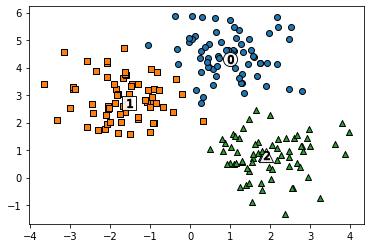

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [ ]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       2                  67
2       1                  66
Name: meanshift_label, dtype: int64


GMM - 거리기반 K-Means의 문제점: 중심점 기반으로 거리적으로 퍼져있지 않은 데이터 분포를 가지지 않는 데이터 세트에 대해서는 효율적인 군집화가 어렵다
- 데이터가 여러개의 다른 가우시안 분포를 가지는 모델로 가정하고 군집화 수행한다. 어떤 정규분포에 속하는지.

GMM의 모수 추정: 개별 정규 분포들의 평균과 분산, 그리고 데이터가 특정 정규 분포에 해당될 확률을 추정
1. Expectation: 개별 데이터 각각에 대해서 특정 정규분포에 소속될 확률을 구하고 가장 높은 확률을 가진 정규분포에 소속
2. Maximization: 데이터들이 Expectation으로 특정 정규분포로 소속되면 다시 해당 정규분포의 평균과 분산을 구함. 
- 더이상 변경되지 않으면 최종 군집화 결정. 아니면 반복

In [ ]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
iris_data = pd.DataFrame(data=iris.data, columns = iris.feature_names)

iris_data['target'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)
iris_data['gmm_cluster'] = gmm_cluster_labels

iris_result = iris_data.groupby(['target'])['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       2              50
1       0              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
iris_data['kmeans_cluster'] = kmeans_cluster_labels
iris_result = iris_data.groupby(['target'])['kmeans_cluster'].value_counts()
iris_result

target  kmeans_cluster
0       0                 50
1       1                 48
        2                  2
2       2                 36
        1                 14
Name: kmeans_cluster, dtype: int64

DBSCAN: 특정 공간 내에 데이터 밀도 차이를 기반 알고리즘으로 하고 있어서 복잡한 기하학적 분포도를 가진 데이터 세트에 대해서도 군집화를 잘 수행한다
- 사용자가 군집 개수를 지정할 수 없다
- 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능이 떨어진다
- 피처의 개수가 많으면 군집화 성능이 떨어진다ᴬ

구성요소
1. 입실론(epsilon)으로 표기하는 주변 영역: 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역
2. 최소 데이터 개수(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수
3. 핵심(Core) 포인트, 이웃 포인트, 경계(Border) 포인트, 잡음 포인트

- eps: 입실론 주변 영역의 반경
- min_samples: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함되어야 할 데이터의 최소 개수

방법: 점을 중심으로 epsilon 반경내에 minPts 이상수의 점이 있으면 그 점을 중심으로 군집이 되고 그 점을 core point라고 한다. Core point 가 서로 다른 core point의 군집의 일부가 되면 그 군집을 서로 연결되어 있다고 하고 하나의 군집으로 연결을 한다. 

 군집에는 속하지만, 스스로 core point가 안되는 점을 border point라고 하고, 주로 클러스터의 외곽을 이루는 점이 된다. 

그리고 어느 클러스터에도 속하지 않는 점은 Noise point가 된다.

In [ ]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=6, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
iris_data['dbscan_cluster'] = dbscan_labels
iris_result = iris_data.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                44
        -1                 6
Name: dbscan_cluster, dtype: int64


In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/Online Retail.xlsx'
retail_df = pd.read_excel(train)
retail_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
#Description Null
#Customer ID Null
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
retail_df[retail_df['Description'].isnull()].iloc[:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [ ]:
retail_df['InvoiceDate'].max

<bound method Series.max of 0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541889   2011-12-09 12:31:00
541890   2011-12-09 12:49:00
541891   2011-12-09 12:49:00
541892   2011-12-09 12:49:00
541893   2011-12-09 12:49:00
Name: InvoiceDate, Length: 354321, dtype: datetime64[ns]>

In [ ]:
retail_df = retail_df[retail_df['Country']=='United Kingdom']
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354321 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    354321 non-null  object        
 1   StockCode    354321 non-null  object        
 2   Description  354321 non-null  object        
 3   Quantity     354321 non-null  int64         
 4   InvoiceDate  354321 non-null  datetime64[ns]
 5   UnitPrice    354321 non-null  float64       
 6   CustomerID   354321 non-null  float64       
 7   Country      354321 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


In [ ]:
retail_df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
retail_df.describe()

,Quantity,UnitPrice,CustomerID
count,354321.000000,354321.000000,354321.000000
mean,12.013795,2.963994,15552.486392
std,189.267956,17.862655,1594.527150
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15522.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
retail_df['sale_amount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df['CustomerID'] = retail_df['CustomerID'].astype(int)

In [ ]:
# DataFrame의 groupby() 의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 컬럼의 max() 에서 데이터 가공
# Frequency는 InvoiceNo 컬럼의 count() , Monetary value는 sale_amount 컬럼의 sum()
aggregations = {
    'InvoiceDate': 'max',
    'InvoiceNo': 'count',
    'sale_amount':'sum'
}
cust_df = retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 컬럼값을 Recency, Frequency, Monetary로 변경
cust_df = cust_df.rename(columns = {'InvoiceDate':'Recency',
                                    'InvoiceNo':'Frequency',
                                    'sale_amount':'Monetary'
                                   }
                        )
cust_df = cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,2011-01-18 10:01:00,1,77183.60
1,12747,2011-12-07 14:34:00,103,4196.01
2,12748,2011-12-09 12:20:00,4595,33719.73


In [ ]:
import datetime as dt

cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x: x.days+1)
print('cust_df 로우와 컬럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 컬럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,3,103,4196.01
2,12748,1,4595,33719.73


(array([3.887e+03, 1.900e+01, 9.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([3.75000000e+00, 2.59691050e+04, 5.19344600e+04, 7.78998150e+04,
        1.03865170e+05, 1.29830525e+05, 1.55795880e+05, 1.81761235e+05,
        2.07726590e+05, 2.33691945e+05, 2.59657300e+05]),
 <a list of 10 Patch objects>)

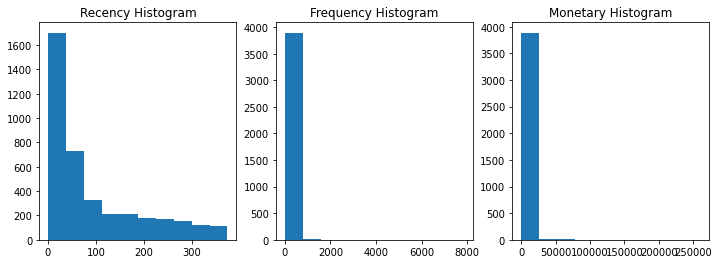

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(12,4), nrows=1, ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])

In [ ]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,92.742092,90.388010,1864.385601
std,99.533485,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,300.280000
50%,51.000000,41.000000,652.280000
75%,143.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

X_features = cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.592


In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성  
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [ ]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

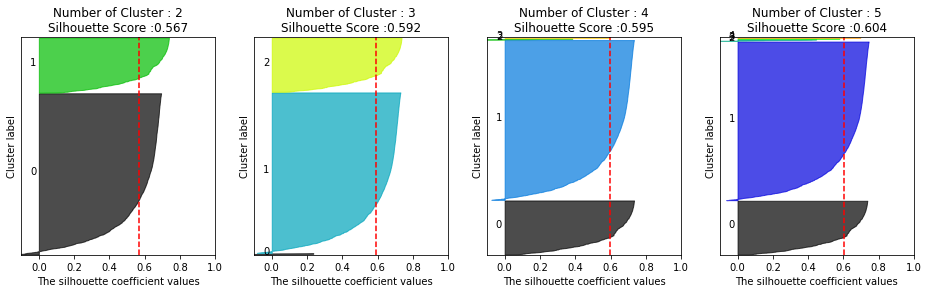

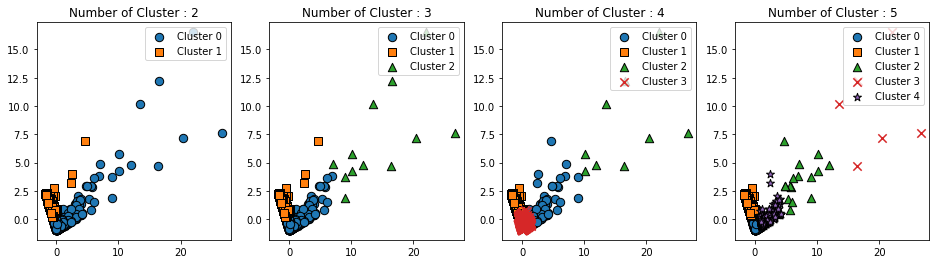

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [ ]:
### Log 변환을 통해 데이터 변환
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

# Recency, Frequecny, Monetary 컬럼에 np.log1p() 로 Log Transformation
cust_df['Recency_log'] = np.log1p(cust_df['Recency'])
cust_df['Frequency_log'] = np.log1p(cust_df['Frequency'])
cust_df['Monetary_log'] = np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features = cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label'] = labels

print('실루엣 스코어는 : {0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는 : 0.303


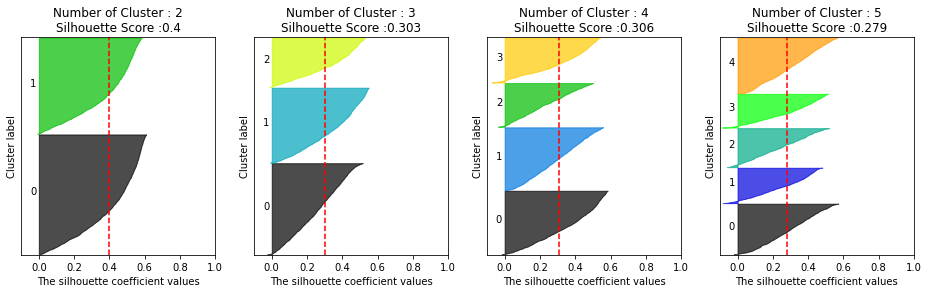

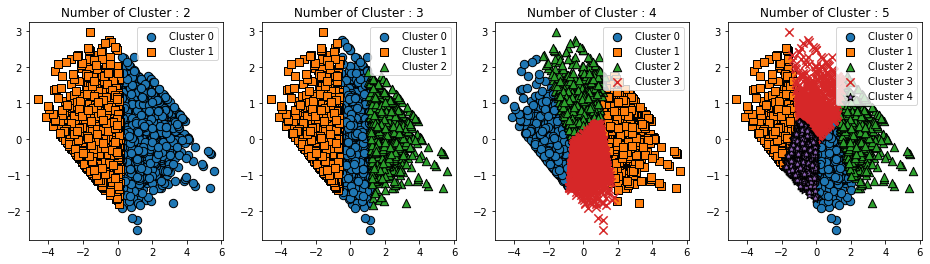

In [ ]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

텍스트 분석
1. Text Classification
2. Sentiment Analysis
3. Summarization
4. 텍스트 군집화와 유사도 측정

Process:
Text 문서 -> Feature Vectorization -> 학습

패키지
- NLTK
- Gensim
- SpaCy

텍스트 전처리
- Cleansing: 불필요한 문자 기호등을 사전에 제거
- Tokenization: 문장 토큰화, 단어 토큰화, n-gram
- 필터링/스톱워드 제거/철자수정: 불필요한 단어나 분석에 큰의미가 없는 단어 그리고 잘못된 철자 수정
- Stemming/Lemmatization: 어근 추출, 의미론적 기반에서 단어 원형 찾아줌

n-gram: 연속된 n개의 단어를 하나의 토큰화 단위로 분리. n개 단어 크기 윈도우를 만들어 문장의 처음부터 오른쪽으로 움직이면서 토큰화를 수행

텍스트의 피처 벡터화 유형
1. Bag of Words(BOW): Document Term Matrix: 개별 문서를 단어들의 횟수나 정규화 변환된 횟수로 표현
- 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처값 추출
- 단점: 문맥 의미 반영 문제, 희소 행렬 문제

BOW 피처 벡터화 유형
- 단순 카운트 기반의 벡터화: Count값이 높을수록 중요한 단어
- TF-IDF 벡터화: 언어의 특성상 문장에서 자주 사용될수 밖에 없는 단어까지 높은 값을 부여하게 된다. 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 페널티를 준다. 
=> TF(Term Frequency): 문서에서 해당단어가 얼마나 나왔는지
=> DF(Document Frequency): 해당 단어가 몇개의 문서에서 나타났는지
=> IDF(Inverse Document Frequency): DF의 역수로서 전체 문서수/DF

2. Word Embedding(Word2Vec): 개별 단어를 문맥을 가지는 N차원 공간에 벡터로 표현



In [ ]:
#CountVectorizer
# max_df: 전체 문서에 걸쳐서 너무 높은 빈도수를 가지는 단어 피처를 제외하기 위한 파라미터
# 1. max_df =100 이면 전체 문서에 걸쳐 100개 이하로 나타나는 단어만 피처로 추출
# 2. max_df = 0.95는 0~95%까지의 단어만 피처로 추출
# min_df: 너무 낮은 빈도수를 가지는 단어피처를 제외
# 1. min_df = 2: 전체 문서에 걸쳐서 2번 이하
# 2. min_df = 0.02 하위 2%이하 빈도수 단어는 추출 X
# max_features: 피처로 추출하는 피처의 개수를 제한하며 정수로 값을 지정
# max_features = 2000, 가장 높은 빈도를 가지는 단어 순으로 정렬해 2000개까지만 피처로 추출
# stop_wrods = 'english'로 하면 영어의 스톱 워드로 지정된 단어는 추출 제외
# ngram_range: (1,1)로 지정하면 토큰화된 단어를 1개씩 추출
# ngram_range= (1,2)이면 단어를 1개씩 순서대로 2개씩 묶어서 피처로 추출
from sklearn.feature_extraction.text import CountVectorizer
cnt_vect = CountVectorizer(ngram_range=(1,2))
cnt_vect.fit(text)
ftr_vect = cnt_vect.transform(text)
print(type(ftr_vect), ftr_vect.shape)
print(cnt_vect.vocabulary_)

희소 행렬의 저장 변환 형식:
COO형식: Coordinate(좌표) 방식을 의미하며 0이 아닌 데이터만 별도의 배열에 저장하고 그 데이터를 가리키는 행과 열의 위치를 별도의 배열에 저장
CSR 형식: COO형식이 위치 배열값을 중복적으로 가지는 문제를 해결한 방식. 일반적으로 CSR>COO
Scipy의 coo_matrix(), csr_matrix()



In [ ]:
import numpy as np

dense = np.array( [ [ 3, 0, 1 ], [0, 2, 0 ] ] )
from scipy import sparse

# 0 이 아닌 데이터 추출
data = np.array([3,1,2])

# 행 위치와 열 위치를 각각 array로 생성 
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])

# sparse 패키지의 coo_matrix를 이용하여 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos,col_pos)))
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

In [ ]:
dense3 = np.array([[0,0,1,0,0,5],
             [1,4,0,3,2,5],
             [0,6,0,3,0,0],
             [2,0,0,0,0,0],
             [0,0,0,7,0,8],
             [1,0,0,0,0,0]])

coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)

In [ ]:
print(coo)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [ ]:
print(csr)

  (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1


In [ ]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset='all', random_state=156)

In [ ]:
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [ ]:
from sklearn.datasets import fetch_20newsgroups

# subset='train'으로 학습용(Train) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
train_news= fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), random_state=156)
X_train = train_news.data
y_train = train_news.target
print(type(X_train))

# subset='test'으로 테스트(Test) 데이터만 추출, remove=('headers', 'footers', 'quotes')로 내용만 추출
test_news= fetch_20newsgroups(subset='test',remove=('headers', 'footers','quotes'),random_state=156)
X_test = test_news.data
y_test = test_news.target
print('학습 데이터 크기 {0} , 테스트 데이터 크기 {1}'.format(len(train_news.data) , len(test_news.data)))

<class 'list'>
학습 데이터 크기 11314 , 테스트 데이터 크기 7532


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
#train으로 fit을 한다음에 train data와 test data의 feature 개수를 맞춰줘야지 predict가 가능해진다
X_train_cnt_vect = cnt_vect.transform(X_train)
X_test_cnt_vect = cnt_vect.transform(X_test)
print(X_train_cnt_vect.shape, X_test_cnt_vect.shape)

(11314, 101631) (7532, 101631)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(X_train_cnt_vect, y_train)
pred = lr.predict(X_test_cnt_vect)
print(accuracy_score(pred, y_test))

0.6076739245884227


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
tf_vect.fit(X_train)
X_train_tf_vect = tf_vect.transform(X_train)
X_test_tf_vect = tf_vect.transform(X_test)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_tf_vect, y_train)
pred = lr.predict(X_test_tf_vect)
print(accuracy_score(pred, y_test))

NameError: ignored

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words='english')),
    ('lr_clf', LogisticRegression())
])

# Pipeline에 기술된 각각의 객체 변수에 언더바(_)2개를 연달아 붙여 GridSearchCV에 사용될 
# 파라미터/하이퍼 파라미터 이름과 값을 설정. . 
params = { 'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
           'tfidf_vect__max_df': [100, 300, 700],
           'lr_clf__C': [1,5,10]
}

# GridSearchCV의 생성자에 Estimator가 아닌 Pipeline 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid=params, cv=3 , scoring='accuracy',verbose=1)
grid_cv_pipe.fit(X_train , y_train)
print(grid_cv_pipe.best_params_ , grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('Pipeline을 통한 Logistic Regression 의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test ,pred)))

NameError: ignored

감성분석: 문서의 주관적인 감성/의견/감정/기분등을 파악하기 위한 방법, 소셜미디어, 여론조사 등에서 활용. 
- 지도 학습 기반의 분석
- 감성 어휘 사전을 이용한 분석: 감성 수치 계산



In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
train = '/content/drive/MyDrive/data/labeledTrainData.tsv'
review_df = pd.read_csv(train, header=0, sep='\t', quoting=3)
review_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [ ]:
print(review_df['review'][0])

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for  

In [ ]:
import re

# <br> html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용하여 영어 문자열이 아닌 문자는 모두 공백으로 변환 
review_df['review'] = review_df['review'].apply( lambda x : re.sub("[^a-zA-Z]", " ", x) )

In [ ]:
feature_target = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, feature_target, test_size=0.3, stratify = feature_target)
X_train.shape

(17500, 1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
pipeline = Pipeline([
                     ("ct_vec", CountVectorizer(stop_words='english', ngram_range=(1,2))),
                     ("lr_vec", LogisticRegression(C=10))
])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
print("accuracy score: {0} , roc_auc_score: {1} \n f1_score: {2}".format(accuracy_score(y_test, pred), roc_auc_score(y_test, pred), f1_score(y_test, pred)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


accuracy score: 0.8874666666666666 , roc_auc_score: 0.8874666666666667 
 f1_score: 0.8887717448603057


감성 어휘 사전 기반의 감성 분석
- SentiWordNet: 감성지수


> 1. 문서 -> 문장 분해
> 2. 문장 -> 단어 토큰화 품사 태깅
> 3. 단어 기반으로 synset 객체와 senti_synset 객체 생성
> 4. Senti_synset 에서 긍정 감성/부정 감성 지수 구하고 이를 모두 합산해 특정 임계치 값 이상일때 긍정 감성으로, 그렇지 않을 때는 부정 감성으로 결정

- VADER
> 소셜 미디어의 감성 분석 용도로 만들어진 Lexicon
> SentimentIntensityAnalyzer 클래스를 이용해 감성 분석 제공
> polarity_scores() 메서드 호출 감성 점수 구한다
> compound score 를 기반으로 결정한다

- Pattern

In [ ]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
def vader_polarity(review,threshold=0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    # compound 값에 기반하여 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환 
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

# apply lambda 식을 이용하여 레코드별로 vader_polarity( )를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply( lambda x : vader_polarity(x, 0.1) )
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print('#### VADER 예측 성능 평가 ####')
get_clf_eval(y_target, vader_preds)

#### VADER 예측 성능 평가 ####
오차 행렬
[[ 6736  5764]
 [ 1867 10633]]
정확도: 0.6948, 정밀도: 0.6485, 재현율: 0.8506,    F1: 0.7359, AUC:0.6948


토픽 모델링: 문서들에 잠재되어 있는 공통된 토픽들을 추출해 내는 기법을 의미한다. 공통된 유사성을 도출한다는 측면에서 문서 군집화/유사도와 비슷한 기법 일수도 있지만 토픽 모델링은 문서들이 가지는 주요 토픽의 분포도와 개별 토픽이 어던 의미인지를 제공.

알고리즘
- LSA, NMF: 행렬분해 기반 토픽 모델링
- pLSA, LDA 확률 기반의 토픽 모델링

LDA: 관찰된 문서내의 단어들을 이용하여 베이즈 추론을 통해 잠재된 문서내 토픽분포와 토픽별 단어 분포를 추론. LDA베이즈 추론의 사전 확률분포로 사용되는 것이 디리클레 분포이다.



In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 의학, 우주 주제를 추출. 
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med'  ]

# 위에서 cats 변수로 기재된 category만 추출. featch_20newsgroups( )의 categories에 cats 입력
news_df= fetch_20newsgroups(subset='all',remove=('headers', 'footers', 'quotes'), 
                            categories=cats, random_state=0)

#LDA 는 Count기반의 Vectorizer만 적용합니다.  
count_vect = CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english', ngram_range=(1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
lda = LatentDirichletAllocation(n_components=8)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8)

In [ ]:
lda.components_

array([[2.71435667e+01, 1.16220624e+02, 2.71337660e+01, ...,
        8.94833038e+00, 8.33369562e+01, 5.72263537e+01],
       [1.09586588e+02, 2.16401161e+01, 9.61370649e+01, ...,
        1.18172044e+01, 3.46828297e+01, 8.43430717e+00],
       [1.25167204e-01, 1.25193934e-01, 1.25097949e-01, ...,
        2.28827262e+02, 1.25069165e-01, 1.26099444e-01],
       ...,
       [2.14171890e+02, 3.74609144e+00, 5.59165819e+01, ...,
        9.98131514e+00, 1.25054416e-01, 5.38457055e+00],
       [1.23597200e+02, 1.25035834e-01, 3.31235593e+00, ...,
        2.68450004e-01, 1.25035556e-01, 1.84744726e-01],
       [1.25268929e-01, 3.78892037e+02, 1.25091503e-01, ...,
        4.29256821e+01, 1.77354823e+02, 6.42063322e+01]])

In [ ]:
def display_topics(model, feature_names, no_top_words):
  for topic_index, topic in enumerate(model.components_):
    print('Topic #', topic_index)

    topic_word_indexes = topic.argsort()[::-1]
    top_indexes = topic_word_indexes[:no_top_words]

    feature_concat = ' '.join([feature_names[i] + '*' + str(round(topic[i],1)) for i in top_indexes])
    print(feature_concat)
    #print(topic)

feature_names = count_vect.get_feature_names()
display_topics(lda, feature_names, 15)

Topic # 0
10*558.2 medical*443.5 health*379.0 1993*370.2 12*351.6 year*336.2 disease*333.1 20*328.1 cancer*321.1 information*303.3 patients*303.1 new*292.7 years*287.1 11*279.8 research*274.1
Topic # 1
edu*1673.7 image*1281.0 graphics*1007.3 available*891.2 jpeg*799.1 ftp*767.9 com*755.2 file*729.3 software*691.6 version*609.3 color*575.5 data*573.1 files*572.4 pub*557.2 images*556.1
Topic # 2
like*1571.5 don*1487.7 just*1375.2 know*1362.2 good*1000.1 ve*919.4 does*876.1 time*853.7 use*784.2 think*774.3 thanks*754.5 way*610.5 want*609.5 need*597.1 make*593.4
Topic # 3
people*846.8 does*645.8 think*633.7 church*530.0 believe*500.1 question*496.3 know*466.1 christian*391.6 don*387.1 just*381.7 like*364.3 christians*338.5 true*316.8 way*316.5 point*316.1
Topic # 4
god*2026.6 people*864.2 said*807.1 jesus*686.7 don*610.6 say*608.5 know*603.5 just*559.4 time*519.7 did*517.0 christ*516.9 didn*513.8 man*477.4 like*465.1 think*435.2
Topic # 5
window*789.1 file*689.9 use*440.4 output*417.0 widg

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
def get_filename_list(newsdata):
  filename_list= []
  for file in newsdata.filenames:
    filename_temp = file.split('\\')[-2:]
    filename = '.'.join(filename_temp)
    filename_list.append(filename)
  
  return filename_list
filename_list = get_filename_list(news_df)
print('filename 개수: ', len(filename_list), 'filename list 10개만: ', filename_list[:10])

filename 개수:  7862 filename list 10개만:  ['/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20630', '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59422', '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38765', '/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38810', '/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59449', '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38461', '/root/scikit_learn_data/20news_home/20news-bydate-train/comp.windows.x/66959', '/root/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104487', '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53875', '/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53617']


In [ ]:
doc_topics = lda.transform(feat_vect)
#lda객체의 transform을 수행하면 개별 문서별 토픽 분포를 반환

In [ ]:
import pandas as pd

topic_names = ['Topic #' + str(i) for i in range(0,8)]
doc_topic_df = pd.DataFrame(data =doc_topics, columns=topic_names, index=filename_list)
doc_topic_df.head(10)

,Topic #0,Topic #1,Topic #2,Topic #3,Topic #4,Topic #5,Topic #6,Topic #7
/root/scikit_learn_data/20news_home/20news-bydate-train/soc.religion.christian/20630,0.013891,0.013893,0.902680,0.013919,0.013912,0.013892,0.013898,0.013915
/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59422,0.387470,0.002121,0.334976,0.266944,0.002124,0.002120,0.002122,0.002121
/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38765,0.005441,0.005450,0.774180,0.005441,0.005439,0.193160,0.005450,0.005439
/root/scikit_learn_data/20news_home/20news-bydate-test/comp.graphics/38810,0.005440,0.313509,0.448835,0.005448,0.005440,0.210450,0.005439,0.005439
/root/scikit_learn_data/20news_home/20news-bydate-test/sci.med/59449,0.006584,0.006592,0.506631,0.235771,0.224664,0.006583,0.006582,0.006595
/root/scikit_learn_data/20news_home/20news-bydate-train/comp.graphics/38461,0.008338,0.198646,0.622609,0.137050,0.008342,0.008339,0.008339,0.008336
/root/scikit_learn_data/20news_home/20news-bydate-train/comp.windows.x/66959,0.408561,0.041711,0.041674,0.041667,0.041667,0.041763,0.341266,0.041691
/root/scikit_learn_data/20news_home/20news-bydate-train/rec.motorcycles/104487,0.273415,0.004811,0.697709,0.004812,0.004813,0.004809,0.004818,0.004813
/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53875,0.344208,0.008939,0.602165,0.008933,0.008947,0.008932,0.008939,0.008938
/root/scikit_learn_data/20news_home/20news-bydate-train/sci.electronics/53617,0.041693,0.041728,0.708130,0.041704,0.041695,0.041671,0.041691,0.041689


문서 군집화: 비슷한 텍스트 구성의 문서를 군집화 하는것입니다.

In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd
import glob ,os

drive.mount('/content/drive')
path = r'/content/drive/MyDrive/data/OpinosisDataset1.0/OpinosisDataset1.0/topics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    # 개별 파일을 읽어서 DataFrame으로 생성 
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    # 절대경로로 주어진 file 명을 가공. 만일 Linux에서 수행시에는 아래 \\를 / 변경. 맨 마지막 .data 확장자도 제거
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename = filename.replace('.data', '')

    #파일명 리스트와 파일내용 리스트에 파일명과 파일 내용을 추가. 
    filename_list.append(filename)
    opinion_text.append(df.to_string())

# 파일명 리스트와 파일내용 리스트를  DataFrame으로 생성
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})
document_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,filename,opinion_text
0,screen_ipod_nano_8gb,...
1,service_holiday_inn_london,...
2,size_asus_netbook_1005ha,...
3,transmission_toyota_camry_2007,...
4,location_bestwestern_hotel_sfo,...


In [ ]:
from nltk.stem import WordNetLemmatizer
#먼저 훈련 말뭉치의 각 단어를 해당 어간으로 수정 한 다음 새 말뭉치에 대해서만 훈련하여
#품사 태그 지정 프로젝트에 NLTK WordNet Lemmatizer를 사용하고 있습니다. 
#그러나 lemmatizer가 예상대로 작동하지 않는다는 것을 알았습니다.
#예를 들어 loves 라는 단어는 올바른 love 로 표현되지만 loving 이라는 단어는 이후에도
#loves 로 남아 있습니다. lemmatization. 여기서 loving 은 "I 'm loving it"문장에서와 같습니다.
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
  return [lemmar.lemmatize(token) for token in tokens]
def LemNormalize(text):
  return LemTokens(nltk.word_tokenize(text.translate(remove_punct_dict)))

문사 유사도 측정 지표
1. Cosine Similarity
- 두 벡터 사이의 Cosine값을 구한다.

2. Jaccard Similarity
3. Manhattan Distance
4. Euclidean Distance



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(feature_vect_simple, feature_vect_simple)

In [ ]:
print(similarity)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]


한글 형태소 분석
- 형태소: 단어로서 의미를 가지는 최소단위
- 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업을 일반적으로 지칭.
- 

In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd
import glob ,os

drive.mount('/content/drive')
path = '/content/drive/MyDrive/data/mecari_train.tsv'
mecari_df = pd.read_csv(path, sep='\t')
mecari_df.head()

Mounted at /content/drive


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [ ]:
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
print(mecari_df.shape)

(1482535, 8)


In [ ]:
print(mecari_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   train_id           1482535 non-null  int64  
 1   name               1482535 non-null  object 
 2   item_condition_id  1482535 non-null  int64  
 3   category_name      1476208 non-null  object 
 4   brand_name         849853 non-null   object 
 5   price              1482535 non-null  float64
 6   shipping           1482535 non-null  int64  
 7   item_description   1482531 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
None


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


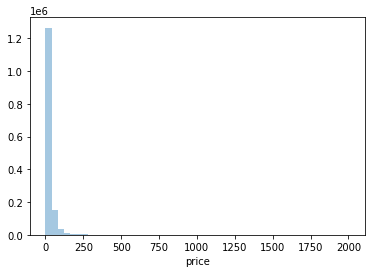

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#target값이 정규분포를 띄는지 확인한다
y_train_df = mecari_df['price']
plt.figure(figsize=(6,4))
sns.distplot(y_train_df, kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


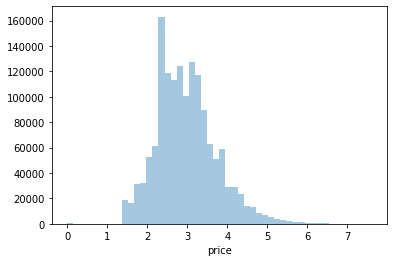

In [ ]:
import numpy as np
y_target = np.log1p(y_train_df)
sns.distplot(y_target, kde=False)

In [ ]:
mecari_df['price'] = np.log1p(mecari_df['price'])
mecari_df['price'].head(3)

0    2.397895
1    3.970292
2    2.397895
Name: price, dtype: float64

In [ ]:
print('Shipping 값 유형:\n',mecari_df['shipping'].value_counts())
print('item_condition_id 값 유형:\n',mecari_df['item_condition_id'].value_counts())

Shipping 값 유형:
 0    819435
1    663100
Name: shipping, dtype: int64
item_condition_id 값 유형:
 1    640549
3    432161
2    375479
4     31962
5      2384
Name: item_condition_id, dtype: int64


In [ ]:
mecari_df[mecari_df['item_description']=='No description yet']['item_description'].count()

82489

In [ ]:
def split_cat(category_name):
  try:
    return category_name.split('/')
  except:
    return ['Other_Null', 'Other_Null', 'Other_Null']

mecari_df['cat_dae'], mecari_df['cat_jung'], mecari_df['cat_so'] = \
                zip(*mecari_df['category_name'].apply(lambda x: split_cat(x)))
print('대분류 유형 :\n', mecari_df['cat_dae'].value_counts())
print('중분류 갯수 :', mecari_df['cat_jung'].nunique())
print('소분류 갯수 :', mecari_df['cat_so'].nunique())

대분류 유형 :
 Women                     664385
Beauty                    207828
Kids                      171689
Electronics               122690
Men                        93680
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30842
Sports & Outdoors          25342
Other_Null                  6327
Name: cat_dae, dtype: int64
중분류 갯수 : 114
소분류 갯수 : 871


In [ ]:
mecari_df['brand_name'] = mecari_df['brand_name'].fillna(value='Other_Null')
mecari_df['category_name'] = mecari_df['category_name'].fillna(value='Other_Null')
mecari_df['item_description'] = mecari_df['item_description'].fillna(value='Other_Null')

# 각 컬럼별로 Null값 건수 확인. 모두 0가 나와야 합니다.
mecari_df.isnull().sum()

train_id             0
name                 0
item_condition_id    0
category_name        0
brand_name           0
price                0
shipping             0
item_description     0
cat_dae              0
cat_jung             0
cat_so               0
dtype: int64

In [ ]:
print('brand name 의 유형 건수 :', mecari_df['brand_name'].nunique())
print('brand name sample 5건 : \n', mecari_df['brand_name'].value_counts()[:5])

brand name 의 유형 건수 : 4810
brand name sample 5건 : 
 Other_Null           632682
PINK                  54088
Nike                  54043
Victoria's Secret     48036
LuLaRoe               31024
Name: brand_name, dtype: int64


In [ ]:
print('name 의 종류 갯수 :', mecari_df['name'].nunique())
print('name sample 7건 : \n', mecari_df['name'][:7])

name 의 종류 갯수 : 1225273
name sample 7건 : 
 0    MLB Cincinnati Reds T Shirt Size XL
1       Razer BlackWidow Chroma Keyboard
2                         AVA-VIV Blouse
3                  Leather Horse Statues
4                   24K GOLD plated rose
5       Bundled items requested for Ruie
6     Acacia pacific tides santorini top
Name: name, dtype: object


In [ ]:
#name속성에 대한 feature vectorization 변환
cnt_vec = CountVectorizer()
X_name = cnt_vec.fit_transform(mecari_df.name)

tfidf_descp = TfidfVectorizer(max_features=50000, ngram_range=(1,3), stop_words='english')
X_descp = tfidf_descp.fit_transform(mecari_df['item_description'])

print(X_name.shape, X_descp.shape)

(1482535, 105757) (1482535, 50000)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
#brand_name, item_condition
lb_brand_name = LabelBinarizer(sparse_output=True)
X_brand = lb_brand_name.fit_transform(mecari_df['brand_name'])

lb_item_cond_id = LabelBinarizer(sparse_output=True)
X_item_cond_id = lb_item_cond_id.fit_transform(mecari_df['item_condition_id'])

lb_shipping= LabelBinarizer(sparse_output=True)
X_shipping = lb_shipping.fit_transform(mecari_df['shipping'])

# cat_dae, cat_jung, cat_so 각 피처들을 희소 행렬 원-핫 인코딩 변환
lb_cat_dae = LabelBinarizer(sparse_output=True)
X_cat_dae= lb_cat_dae.fit_transform(mecari_df['cat_dae'])

lb_cat_jung = LabelBinarizer(sparse_output=True)
X_cat_jung = lb_cat_jung.fit_transform(mecari_df['cat_jung'])

lb_cat_so = LabelBinarizer(sparse_output=True)
X_cat_so = lb_cat_so.fit_transform(mecari_df['cat_so'])

In [ ]:
print(type(X_brand), type(X_item_cond_id), type(X_shipping))
print('X_brand_shape:{0}, X_item_cond_id shape:{1}'.format(X_brand.shape, X_item_cond_id.shape))
print('X_shipping shape:{0}, X_cat_dae shape:{1}'.format(X_shipping.shape, X_cat_dae.shape))
print('X_cat_jung shape:{0}, X_cat_so shape:{1}'.format(X_cat_jung.shape, X_cat_so.shape))

<class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'> <class 'scipy.sparse.csr.csr_matrix'>
X_brand_shape:(1482535, 4810), X_item_cond_id shape:(1482535, 5)
X_shipping shape:(1482535, 1), X_cat_dae shape:(1482535, 11)
X_cat_jung shape:(1482535, 114), X_cat_so shape:(1482535, 871)


In [ ]:
from scipy.sparse import hstack
import gc
#hstack은 NumPy ndarray 형식의 배열을 옆으로 결합하는 방법
sparse_matrix_list = (X_name, X_descp, X_brand, X_item_cond_id, X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
X_features_sparse = hstack(sparse_matrix_list).tocsr()
print(type(X_features_sparse), X_features_sparse.shape)

del X_features_sparse
gc.collect()

<class 'scipy.sparse.csr.csr_matrix'> (1482535, 161569)


660

In [ ]:
def rmsle(y, y_pred):
  return np.sqrt(np.mean(np.power(np.log1p(y) - np.log1p(y_pred), 2)))

def evaluate_org_price(y_test, preds):
  preds_exmpm = np.expm1(preds)
  y_test_exmpm = np.expm1(y_test)
  rmsle_result = rmsle(y_test_exmpm, preds_exmpm)
  return rmsle_result


In [ ]:
import gc
from scipy.sparse import hstack

def model_train_predict(model, matrix_list):
  X=hstack(matrix_list).tocsr()
  X_train,X_test,y_train,y_test = train_test_split(X, mecari_df['price'], test_size=0.2, random_state=156)

  model.fit(X_train, y_train)
  preds = model.predict(X_test)
  del X, X_train, X_test, y_train

  gc.collect()
  return preds, y_test

In [ ]:
linear_model = Ridge(solver = "lsqr", fit_intercept=False)

sparse_matrix_list = (X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model ,matrix_list=sparse_matrix_list)
print('Item Description을 제외했을 때 rmsle 값:', evaluate_org_price(y_test , linear_preds))

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)
linear_preds , y_test = model_train_predict(model=linear_model , matrix_list=sparse_matrix_list)
print('Item Description을 포함한 rmsle 값:',  evaluate_org_price(y_test ,linear_preds))

Item Description을 제외했을 때 rmsle 값: 0.5023727038010544
Item Description을 포함한 rmsle 값: 0.4712195143433641


In [ ]:
from lightgbm import LGBMRegressor

sparse_matrix_list = (X_descp, X_name, X_brand, X_item_cond_id,
                      X_shipping, X_cat_dae, X_cat_jung, X_cat_so)

lgbm_model = LGBMRegressor(n_estimators=200, learning_rate=0.5, num_leaves=125, random_state=156)
lgbm_preds , y_test = model_train_predict(model = lgbm_model , matrix_list=sparse_matrix_list)
print('LightGBM rmsle 값:',  evaluate_org_price(y_test , lgbm_preds))

LightGBM rmsle 값: 0.45719580244261243


In [ ]:
preds = lgbm_preds * 0.45 + linear_preds * 0.55
print('LightGBM과 Ridge를 ensemble한 최종 rmsle 값:',  evaluate_org_price(y_test , preds))

LightGBM과 Ridge를 ensemble한 최종 rmsle 값: 0.4507259214329315


추천 시스템 방식: 
1. 콘텐츠 기반 필터링
- 콘텐츠에 기반한 속성. 
- 영화 구성 콘텐츠 텍스트 -> 피처 벡터화 -> 코사인 유사도 -> 콘텐츠 별로 가중 평점 계산 -> 유사도 및 평점에 따른 영화 추천
2. 협업 필터링



In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd
import glob ,os

drive.mount('/content/drive')
path = '/content/drive/MyDrive/data/tmdb_5000_movies.csv'
movies = pd.read_csv(path)
movies.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
movies_df = movies[['id','title', 'genres', 'vote_average', 'vote_count',
                 'popularity', 'keywords', 'overview']]
pd.set_option('max_colwidth', 100)
movies_df[['genres','keywords']][:1]
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
movies_df['genres'] = movies_df['genres'].apply(lambda x : [ y['name'] for y in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x : [ y['name'] for y in x])
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

movies_df['genres_literal'] = movies_df['genres'].apply(lambda x: ' '.join(x))
print('Before: ' , movies_df['genres_literal'].shape)
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print('After: ',genre_mat.shape)

Before:  (4803,)
After:  (4803, 276)


In [ ]:
movies_df['keywords_literal'] = movies_df['keywords'].apply(lambda x: ' '.join(x))
print('Before: ' , movies_df['keywords_literal'].shape)
count_vect2 = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat2 = count_vect.fit_transform(movies_df['keywords_literal'])
print('After: ',genre_mat2.shape)

Before:  (4803,)
After:  (4803, 41554)


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)
print(genre_sim[:2])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]]


In [ ]:
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


In [ ]:
title_movie = movies_df[movies_df['title']=='The Godfather']
title_movie.index.values

array([3337])

In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n = 10):
  title_movie = df[df['title'] == title_name]
  title_index = title_movie.index.values
  similar_indexes = sorted_ind[title_index, :(top_n)]
  print(similar_indexes)
  similar_indexes = similar_indexes.reshape(-1)
  return df.iloc[similar_indexes]

In [ ]:
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


In [ ]:
C = movies_df['vote_average'].mean()
m = movies_df['vote_count'].quantile(0.6)
print('C: ', round(C,3), 'm:',round(m,3))

C:  6.092 m: 370.2


In [ ]:
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile)
C = movies_df['vote_average'].mean()

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 

In [ ]:
movies_df[['title','vote_average','weighted_vote','vote_count']].sort_values('weighted_vote',
                                                                          ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [ ]:
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
    
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
# 기준 영화 index는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]

similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427


협업 필터링
- 사용자 기반: 당신과 비슷한 고객이 다음 상품도 구매했습니다
- 아이템기반: 특정 상품과 유사한 좋은 평가를 받은 다른 비슷한 상품을 추천



In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd
import glob ,os

drive.mount('/content/drive')
ratings = '/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/ratings.csv'
movies = '/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/movies.csv'

movies = pd.read_csv(movies)
ratings = pd.read_csv(ratings)

movies.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
print(movies.shape, ratings.shape)

(9742, 3) (100836, 4)


In [ ]:
ratings = ratings[['userId', 'movieId', 'rating']]
ratings_matrix = ratings.pivot_table('rating', index='userId', columns='movieId')
ratings_matrix.head(3)

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


아이템 기반 협업 필터링 구현 순서
1. 사용자-아이템 행렬 데이터를 아이템-사용자 행렬 데이터로 변환
2. 아이템간의 코사인 유사도로 아이템 유사도 산출
3. 사용자가 관람 하지 않은 아이템중에서 아이템간 유사도를 반영한 예측점수 계산
4. 예측점수가 가장 높은 순으로 아이템 추천

In [ ]:
rating_movies = pd.merge(ratings, movies, on='movieId')
ratings_matrix = rating_movies.pivot_table('rating', index='userId', columns='title')
ratings_matrix = ratings_matrix.fillna(0)
ratings_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix_T = ratings_matrix.transpose()
ratings_matrix_T.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix_T.shape

(9719, 610)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
item_sim = cosine_similarity(ratings_matrix_T, ratings_matrix_T)
item_sim_df = pd.DataFrame(data=item_sim, index=ratings_matrix.columns, columns=ratings_matrix.columns)
print(item_sim_df.shape)
item_sim_df.head()

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.285169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65561,0.0,0.0,0.0,0.212814,0.919145,0.0,0.0,0.120996,0.0,0.0,0.0,0.149201,0.0,0.0,0.0,0.178042,0.0,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.715542,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.150269,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.124109,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.148970,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,0.707107,0.505964,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106256,0.0,0.0,0.0,0.0,0.0,0.707107,0.0,0.0,0.0,0.197457,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.105338,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.644503,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.155137,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There

In [ ]:
item_sim_df['Inception (2010)'].sort_values(ascending=False)[1:6]

title
Dark Knight, The (2008)          0.727263
Inglourious Basterds (2009)      0.646103
Shutter Island (2010)            0.617736
Dark Knight Rises, The (2012)    0.617504
Fight Club (1999)                0.615417
Name: Inception (2010), dtype: float64

In [ ]:
def predict_rating(ratings_arr, item_sim_arr):
  ratings_pred = ratings_arr.dot(item_sim_arr)/np.array([np.abs(item_sim_arr).sum(axis=1)])
  return ratings_pred

ratings_pred = predict_rating(ratings_matrix.values, item_sim_df.values)
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index = ratings_matrix.index, columns = ratings_matrix.columns)
ratings_pred_matrix.head(3)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.070345,0.577855,0.321696,0.227055,0.206958,0.194615,0.249883,0.102542,0.157084,0.178197,0.119402,0.185026,0.269199,0.521031,0.141683,0.116623,0.135441,0.224885,0.226528,0.113608,0.185277,0.303638,0.113608,0.255040,0.260446,0.326968,0.305769,0.155031,0.348717,0.186870,0.119402,0.099756,0.206331,0.348717,0.267407,0.237128,0.050947,0.050947,0.200747,0.156893,...,0.186554,0.050947,0.040443,0.121184,0.178482,0.104488,0.104488,0.110808,0.102542,0.175859,0.179162,0.231606,0.093467,0.094357,0.112690,0.113608,0.164231,0.086360,0.277215,0.262709,0.180320,0.112690,0.111653,0.130131,0.248312,0.132009,0.285913,0.113608,0.155861,0.155927,0.113608,0.181738,0.133962,0.128574,0.006179,0.212070,0.192921,0.136024,0.292955,0.720347
2,0.018260,0.042744,0.018861,0.000000,0.000000,0.035995,0.013413,0.002314,0.032213,0.014863,0.000000,0.005220,0.093722,0.000000,0.014296,0.016398,0.043685,0.019004,0.020071,0.015640,0.028349,0.043477,0.015640,0.019634,0.016893,0.008251,0.010919,0.013711,0.000000,0.020300,0.000000,0.002726,0.022639,0.000000,0.032268,0.031130,0.040699,0.040699,0.024950,0.043495,...,0.021269,0.040699,0.030610,0.019721,0.002215,0.023352,0.023352,0.028403,0.002314,0.006791,0.033143,0.010933,0.018806,0.003525,0.011425,0.015640,0.030904,0.017290,0.019250,0.039449,0.038895,0.011425,0.035400,0.038101,0.034181,0.026764,0.000000,0.015640,0.037980,0.006859,0.015640,0.020855,0.020119,0.015745,0.049983,0.014876,0.021616,0.024528,0.017563,0.000000
3,0.011884,0.030279,0.064437,0.003762,0.003749,0.002722,0.014625,0.002085,0.005666,0.006272,0.091413,0.007483,0.018710,0.080626,0.006995,0.006766,0.006988,0.005427,0.006743,0.006923,0.005389,0.008943,0.006923,0.008559,0.009333,0.006316,0.031652,0.007376,0.009832,0.022056,0.091413,0.002548,0.008762,0.009832,0.008773,0.004379,0.001117,0.001117,0.007007,0.005163,...,0.008810,0.001117,0.000000,0.010758,0.007362,0.003726,0.0

In [ ]:
from sklearn.metrics import mean_squared_error
#사용자가 평점을 부여한 영화에 대해서만 예측 성능 평가 MSE를 구한다
def get_mse(pred, actual):
  pred = pred[actual.nonzero()].flatten()
  actual = actual[actual.nonzero()].flatten()
  return mean_squared_error(pred, actual)

print('아이템 기반 모든 인접 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values))

아이템 기반 모든 인접 이웃 MSE:  9.895354759094706


In [ ]:
ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...All the Marbles (1981),...And Justice for All (1979),00 Schneider - Jagd auf Nihil Baxter (1994),1-900 (06) (1994),10 (1979),10 Cent Pistol (2015),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Streets (2016),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Dalmatians II: Patch's London Adventure (2003),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),10th & Wolf (2006),"10th Kingdom, The (2000)","10th Victim, The (La decima vittima) (1965)","11'09""01 - September 11 (2002)",11:14 (2003),"11th Hour, The (2007)",12 Angry Men (1957),12 Angry Men (1997),12 Chairs (1971),12 Chairs (1976),12 Rounds (2009),12 Years a Slave (2013),...,Zathura (2005),Zatoichi and the Chest of Gold (Zatôichi senryô-kubi) (Zatôichi 6) (1964),Zazie dans le métro (1960),Zebraman (2004),"Zed & Two Noughts, A (1985)",Zeitgeist: Addendum (2008),Zeitgeist: Moving Forward (2011),Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zero de conduite (Zero for Conduct) (Zéro de conduite: Jeunes diables au collège) (1933),Zeus and Roxanne (1997),Zipper (2015),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Strippers! (2008),Zombieland (2009),Zone 39 (1997),"Zone, The (La Zona) (2007)",Zookeeper (2011),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoom (2015),Zootopia (2016),Zulu (1964),Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_matrix.shape[1]

9719

In [ ]:
def predict_rating_topsim(ratings_arr, item_sim_arr, n=20):
  pred = np.zeros(ratings_arr.shape)
  for col in range(ratings_arr.shape[1]):
    top_n_items = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]]
    for row in range(ratings_arr.shape[0]):
      pred[row,col] = item_sim_arr[col, :][top_n_items].dot(ratings_arr[row, :][top_n_items])
      pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n_items]))
  
  return pred

In [ ]:
ratings_pred = predict_rating_topsim(ratings_matrix.values , item_sim_df.values, n=20)
print('아이템 기반 인접 TOP-20 이웃 MSE: ', get_mse(ratings_pred, ratings_matrix.values ))


# 계산된 예측 평점 데이터는 DataFrame으로 재생성
ratings_pred_matrix = pd.DataFrame(data=ratings_pred, index= ratings_matrix.index,
                                   columns = ratings_matrix.columns)

아이템 기반 인접 TOP-20 이웃 MSE:  3.6949827608772314


In [ ]:
user_rating_id = ratings_matrix.loc[9, :]
user_rating_id[ user_rating_id > 0].sort_values(ascending=False)[:10]
def get_unseen_movies(ratings_matrix, userId):
    # userId로 입력받은 사용자의 모든 영화정보 추출하여 Series로 반환함. 
    # 반환된 user_rating 은 영화명(title)을 index로 가지는 Series 객체임. 
    user_rating = ratings_matrix.loc[userId,:]
    
    # user_rating이 0보다 크면 기존에 관람한 영화임. 대상 index를 추출하여 list 객체로 만듬
    already_seen = user_rating[ user_rating > 0].index.tolist()
    
    # 모든 영화명을 list 객체로 만듬. 
    movies_list = ratings_matrix.columns.tolist()
    
    # list comprehension으로 already_seen에 해당하는 movie는 movies_list에서 제외함. 
    unseen_list = [ movie for movie in movies_list if movie not in already_seen]
    
    return unseen_list
def recomm_movie_by_userid(pred_df, userId, unseen_list, top_n=10):
    # 예측 평점 DataFrame에서 사용자id index와 unseen_list로 들어온 영화명 컬럼을 추출하여
    # 가장 예측 평점이 높은 순으로 정렬함. 
    recomm_movies = pred_df.loc[userId, unseen_list].sort_values(ascending=False)[:top_n]
    return recomm_movies
    
# 사용자가 관람하지 않는 영화명 추출   
unseen_list = get_unseen_movies(ratings_matrix, 9)

# 아이템 기반의 인접 이웃 협업 필터링으로 영화 추천 
recomm_movies = recomm_movie_by_userid(ratings_pred_matrix, 9, unseen_list, top_n=10)

# 평점 데이타를 DataFrame으로 생성. 
recomm_movies = pd.DataFrame(data=recomm_movies.values,index=recomm_movies.index,columns=['pred_score'])
recomm_movies

,pred_score
title,
Shrek (2001),0.866202
Spider-Man (2002),0.857854
"Last Samurai, The (2003)",0.817473
Indiana Jones and the Temple of Doom (1984),0.816626
"Matrix Reloaded, The (2003)",0.800990
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),0.765159
Gladiator (2000),0.740956
"Matrix, The (1999)",0.732693
Pirates of the Caribbean: The Curse of the Black Pearl (2003),0.689591


**잠재 요인 협업 필터링**
- 사용자-아이템 평점 행렬 속에 숨어 있는 잠재 요인을 추출해 추천 예측을 할 수 있게 하는 기법. 분해하는 과정에서 잠재요인을 추출, 평점 행렬 재 구성하면서 추천을 구현한다.

 

Surprise는 무비렌즈 데이터 세트와 같이 userid, itemid, rating 컬럼들이 사용자(userid)를 기준으로 한 로우 레벨의 평점 데이터로 구성된 데이터 세트만 입력 가능
- Dataset.laod_builtin(name='ml-100k'): 무비렌즈 아카이브 FTP 서버에서 무지렌즈 데아터를 내려받습니다. 
- Reader: Raw데이터 소스에서 Dataset로 로딩 규칙을 지정하기 위해 사용됩니다. 

In [ ]:
!pip install numpy
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 4.6 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1619420 sha256=6e950218d95840c83212b71e2ea4a5d26ad826223184e8c30c0808b75490917e
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, Dataset, accuracy
from surprise.model_selection import train_test_split

In [ ]:
data = Dataset.load_builtin('ml-100k')
trainset, testset = train_test_split(data, test_size=.25)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] ㅛ
Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [ ]:
algo = SVD()
algo.fit(trainset)

In [ ]:
predictions = algo.test(testset)
predictions[:5]

[Prediction(uid='878', iid='482', r_ui=4.0, est=3.5997714051249456, details={'was_impossible': False}),
 Prediction(uid='246', iid='164', r_ui=3.0, est=2.749161182745457, details={'was_impossible': False}),
 Prediction(uid='475', iid='286', r_ui=2.0, est=3.595749927230082, details={'was_impossible': False}),
 Prediction(uid='561', iid='503', r_ui=4.0, est=3.1418185338955187, details={'was_impossible': False}),
 Prediction(uid='679', iid='73', r_ui=4.0, est=3.2730721883966827, details={'was_impossible': False})]

In [ ]:
[(pred.uid, pred.iid, pred.est) for pred in predictions[:3]]

[('878', '482', 3.5997714051249456),
 ('246', '164', 2.749161182745457),
 ('475', '286', 3.595749927230082)]

In [ ]:
uid = str(196)
lid = str(302)
pred = algo.predict(uid, lid)
print(pred)

user: 196        item: 302        r_ui = None   est = 3.92   {'was_impossible': False}


In [ ]:
accuracy.rmse(predictions)

RMSE: 0.9375


0.937530239263705

In [ ]:
#Decision Classifier에서는 feature_importances 를 통해 feature들을 파악할수 있다
from google.colab import drive
import pandas as pd
import glob ,os

drive.mount('/content/drive')
ratings = '/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/ratings.csv'
movies = '/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/movies.csv'

movies = pd.read_csv(movies)
ratings = pd.read_csv(ratings)

movies.head()

Mounted at /content/drive


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings.to_csv('/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/ratings_noh.csv', index=False, header=False)

In [ ]:
from surprise import Reader

reader = Reader(line_format = 'user item rating timestamp', sep=',', rating_scale=(0.5,5))
data  = Dataset.load_from_file('/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/ratings_noh.csv', reader= reader)

In [ ]:
trainset, testset = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(n_factors=50, random_state=0)

algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

In [ ]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.25, random_state=0)
algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

RMSE: 0.8682


0.8681952927143516

In [ ]:
from surprise.model_selection import cross_validate
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8736  0.8662  0.8702  0.8725  0.8672  0.8699  0.0029  
MAE (testset)     0.6701  0.6651  0.6674  0.6700  0.6679  0.6681  0.0018  
Fit time          3.20    3.17    3.22    3.17    3.22    3.20    0.02    
Test time         0.20    0.15    0.16    0.17    0.15    0.17    0.02    


{'fit_time': (3.2027111053466797,
  3.173670530319214,
  3.2235660552978516,
  3.1716067790985107,
  3.2151288986206055),
 'test_mae': array([0.67011635, 0.66513761, 0.66743668, 0.67002516, 0.66789744]),
 'test_rmse': array([0.87356569, 0.86619665, 0.87021736, 0.87249192, 0.86715133]),
 'test_time': (0.1962263584136963,
  0.14994168281555176,
  0.1607208251953125,
  0.1744096279144287,
  0.15277314186096191)}

In [ ]:
from surprise.model_selection import GridSearchCV
param_grid = {'n_epochs':[20,40,60], 'n_factors':[50,100,200]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
gs.fit(data)
print(gs.best_score['rmse'])
print(gs.best_params['rmse'])

0.8763524155257182
{'n_epochs': 20, 'n_factors': 50}


In [ ]:
from surprise.dataset import DatasetAutoFolds
from surprise.dataset import Reader
from surprise import SVD

reader = Reader(line_format='user item rating timestamp', sep=',',
               rating_scale=(0.5, 5))

# DatasetAutoFolds 클래스를 사용해서 개별적으로 생성
# index와 header가 없는 상태로 재생성했던 ratings_surprise.csv파일에 기반
data_folds = DatasetAutoFolds(ratings_file='/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/ratings_noh.csv',
                             reader=reader)

# 위에서 개별적으로 생성한 csv파일을 학습데이터로 생성
trainset = data_folds.build_full_trainset()
algo = SVD(n_factors=50, n_epochs=20, random_state=42)
algo.fit(trainset)

# 영화에 대한 정보 데이터 로딩
movies = pd.read_csv('/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/data/ml-latest-small/ml-latest-small/ratings.csv')
# 특정 사용자 9번의 movieId를 추출해서 특정 영화에 대한 평점 있는지 확인
movieIds = ratings[ratings['userId']==9]['movieId']
if movieIds[movieIds==42].count() == 0:
    print('user id=9인 사람은 movie id=42에 대한 평점이 없음')
    
# 영화에 대한 정보 데이터에서 movieId가 42인 영화가 무엇인지 출력
print(movies[movies['movieId']==42])

def get_unseen_surprise(ratings, movies, userId):
    # 특정 유저가 본 movie id들을 리스트로 할당
    seen_movies = ratings[ratings['userId']==userId]['movieId'].tolist()
    # 모든 영화들의 movie id들 리스트로 할당
    total_movies = movies['movieId'].tolist()
    
    # 모든 영화들의 movie id들 중 특정 유저가 본 movie id를 제외한 나머지 추출
    unseen_movies = [movie for movie in total_movies if movie not in seen_movies]
    print(f'특정 {userId}번 유저가 본 영화 수: {len(seen_movies)}\n추천한 영화 개수: {len(unseen_movies)}\n전체 영화수: {len(total_movies)}')
    
    return unseen_movies

def recomm_movie_by_surprise(algo, userId, unseen_movies, top_n=10):
    # 알고리즘 객체의 predict()를 이용해 특정 userId의 평점이 없는 영화들에 대해 평점 예측
    predictions = [algo.predict(str(userId), str(movieId)) for movieId in unseen_movies]
    
    # predictions는 Prediction()으로 하나의 객체로 되어있기 때문에 예측평점(est값)을 기준으로 정렬해야함
    # est값을 반환하는 함수부터 정의. 이것을 이용해 리스트를 정렬하는 sort()인자의 key값에 넣어주자!
    def sortkey_est(pred):
        return pred.est
    
    # sortkey_est함수로 리스트를 정렬하는 sort함수의 key인자에 넣어주자
    # 리스트 sort는 디폴트값이 inplace=True인 것처럼 정렬되어 나온다. reverse=True가 내림차순
    predictions.sort(key=sortkey_est, reverse=True)
    # 상위 n개의 예측값들만 할당
    top_predictions = predictions[:top_n]
    
    # top_predictions에서 movie id, rating, movie title 각 뽑아내기
    top_movie_ids = [int(pred.iid) for pred in top_predictions]
    top_movie_ratings = [pred.est for pred in top_predictions]
    top_movie_titles = movies[movies.movieId.isin(top_movie_ids)]['title']
    # 위 3가지를 튜플로 담기
    # zip함수를 사용해서 각 자료구조(여기선 리스트)의 똑같은 위치에있는 값들을 mapping
    # zip함수는 참고로 여러개의 문자열의 똑같은 위치들끼리 mapping도 가능!
    top_movie_preds = [(ids, rating, title) for ids, rating, title in zip(top_movie_ids, top_movie_ratings, top_movie_titles)]
    
    return top_movie_preds

### 위에서 정의한 함수를 사용해 특정 유저의 추천 영화들 출력해보기
unseen_lst = get_unseen_surprise(ratings, movies, 9)
top_movies_preds = recomm_movie_by_surprise(algo, 9, unseen_lst,
                                           top_n=10)
print()
print('#'*8,'Top-10 추천영화 리스트','#'*8)

# top_movies_preds가 여러가지의 튜플을 담고 있는 리스트이기 때문에 반복문 수행
for top_movie in top_movies_preds:
    print('* 추천 영화 이름: ', top_movie[2])
    print('* 해당 영화의 예측평점: ', top_movie[1])
    print()

user id=9인 사람은 movie id=42에 대한 평점이 없음
    movieId                   title              genres
38       42  Dead Presidents (1995)  Action|Crime|Drama
특정 9번 유저가 본 영화 수: 46
추천한 영화 개수: 9696
전체 영화수: 9742

######## Top-10 추천영화 리스트 ########
* 추천 영화 이름:  Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)
* 해당 영화의 예측평점:  4.322402915230924

* 추천 영화 이름:  Philadelphia Story, The (1940)
* 해당 영화의 예측평점:  4.172423325516417

* 추천 영화 이름:  Rear Window (1954)
* 해당 영화의 예측평점:  4.160378620971996

* 추천 영화 이름:  His Girl Friday (1940)
* 해당 영화의 예측평점:  4.100292470156684

* 추천 영화 이름:  Boot, Das (Boat, The) (1981)
* 해당 영화의 예측평점:  4.095329442967445

* 추천 영화 이름:  Seventh Seal, The (Sjunde inseglet, Det) (1957)
* 해당 영화의 예측평점:  4.063138824378055

* 추천 영화 이름:  Boogie Nights (1997)
* 해당 영화의 예측평점:  4.0625243261156925

* 추천 영화 이름:  Life Is Beautiful (La Vita è bella) (1997)
* 해당 영화의 예측평점:  4.049268225445741

* 추천 영화 이름:  Guess Who's Coming to Dinner (1967)
* 해당 영화의 예측평점:  4.04578027089272

* 추천 영화